<a id='home'></a>
### purpose

compare structure-corrected vs -uncorrected RDA offsets

compare RDA outlier markers to other markers

### outline

1. [Within-landscape validation](#within)

   1. [get scores for RDA](#withinscores)
   1. [compare marker sets](#compwithin)
   1. [compare structure-corrected vs uncorrected](#withinstruct)

1. [climate outlier scores](#climate)
    1. [get scores for RDA](#climget)
    1. [compare marker sets](#climout)
    1. [compare structure-corrected vs uncorrected](#climstruct)
    
1. [complex sim scores](#compcomp)
    1. [compare marker sets](#compmark)
    1. [compare structure-corrected vs uncorrected](#compstruct)

In [1]:
from pythonimports import *
from myfigs import adjust_box_widths

import MVP_summary_functions as mvp

import seaborn as sns

t0 = dt.now()  # notebook timer

mvp.latest_commit()
session_info.show()

#########################################################
Today:	August 15, 2023 - 12:25:05 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



<a id='within'></a>
# within-landscape scores

[top](#home)

<a id='withinscores'></a>
### get scores for RDA

In [2]:
level_dicts = mvp.combine_level_dicts(use_bcs_data=False, remove_rda_outliers=False, keep_nuisance=False)

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = None
	ntraits = None
	marker_set = None
	remove_structcrxn = False
	keep_nuisance = False
	remove_rda_outliers = False


reading reps: 100%|███████████████| 10/10 [00:21<00:00,  2.14s/it]


0-225
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1125-1350
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1350-1575
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1575-1800
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1800-2025
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


2025-2250
	 RONA num seeds =  225
	 lfmm2 num seeds =  22

In [3]:
rda_scores = level_dicts['rda']

rda_scores.structcrxn.value_counts()

nocorr        900000
structcorr    900000
Name: structcrxn, dtype: int64

In [4]:
rda_scores['program'].value_counts()

rda-nocorr        900000
rda-structcorr    900000
Name: program, dtype: int64

In [5]:
rda_scores.marker_set.value_counts()

adaptive        450000
all             450000
neutral         450000
rda outliers    450000
Name: marker_set, dtype: int64

In [6]:
mvp.hue_order['marker_set']

['adaptive', 'all', 'neutral']

In [7]:
mvp.hue_order['marker_set'].append('rda outliers')

mvp.hue_order['marker_set']

['adaptive', 'all', 'neutral', 'rda outliers']

<a id='compwithin'></a>
### compare marker sets (within-landscape validation)

[top](#home)

In [67]:
rda_program_order = ['rda-nocorr', 'rda-structcorr']

def plot_marker_comparisons(data, ntraits=None, ignore=[], replace=None):
    
    ignore.append('marker_set')

    for x, x_order in mvp.hue_order.items():
        if x in ignore:
            continue

        g = sns.catplot(data=data,
                        x=x,
                        y='score',
                        order=x_order if x != 'program' else rda_program_order,
                        hue='marker_set',
                        hue_order=mvp.hue_order['marker_set'],
                        col='program' if x != 'program' else None,
                        col_order=rda_program_order if x !='program' else None,
                        **mvp.boxplot_kwargs,
                        kind='box',
#                         legend=False
                   )

        adjust_box_widths(list(g.axes[0]), 0.8)
        mvp.jitter_fliers(g)

        g.set(ylim=(1, -1))
        
        g._legend.remove()
        
        g.figure.set_size_inches(12, 4)
        
        if x == 'program':
            text_x = 0.43
        else:
            text_x = 0.475
        print(f'{x = } {text_x = }')
        
        g.figure.suptitle(x=text_x, t=ntraits, fontsize=13)
        
        mvp.add_legend(g.figure, color_by='marker_set', one_trait=True if ntraits=='1-trait' else False,
                       loc='upper center',
                       bbox_to_anchor=(text_x, 1.15),
                       only_rda=True,
                       ncol='auto'
                      )
        
        g.set_axis_labels(mvp.factor_names[x], "Performance (Kendall's $\\tau$)", fontsize=12)
        
        mvp.update_ticklabels(g.axes.flat[0], replace=(' - ', '\n'))
        
        for i, ax in enumerate(g.axes[0]):
            ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
            if x != 'program':
                ax.set_title(mvp.factor_names[rda_program_order[i]])
            else:
                ax.set_title('')

#         print(f'{x = }')
        if x not in ['landscape']:
            if x in ['popsize', 'demography']:
                rotation=20
            else:
                rotation=None
            for ax in g.axes[0]:
                ax.set_xticklabels(
                    [label.get_text().replace(' ', '\n') for label in g.axes.flat[0].get_xticklabels()],
                    rotation=rotation
                )
        
        g.tight_layout()
        
        plt.show()

    pass

#### 1-trait sims (within-landscape validation)

x = 'landscape' text_x = 0.475


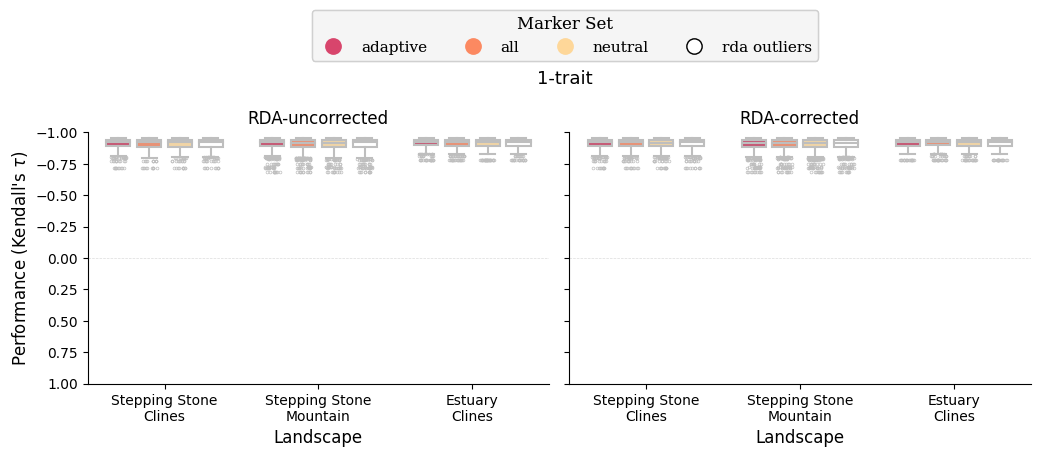

x = 'glevel' text_x = 0.475


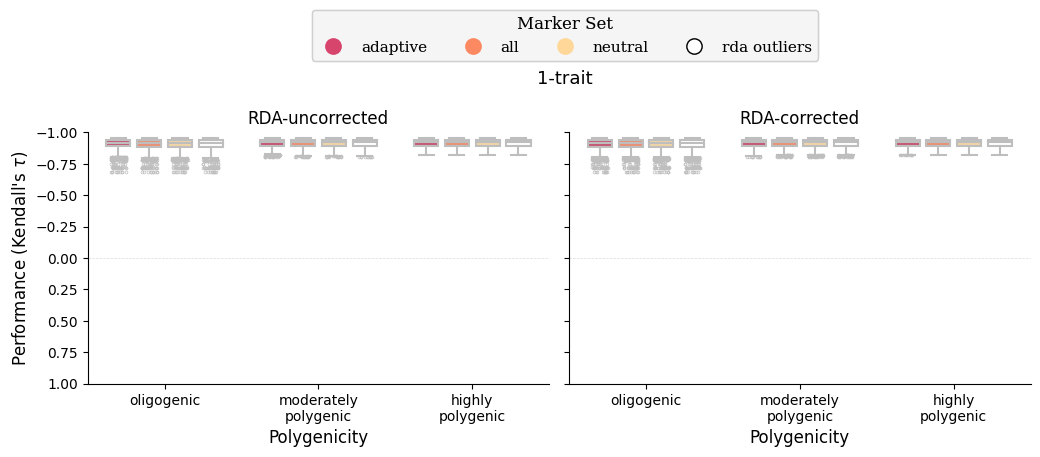

x = 'popsize' text_x = 0.475


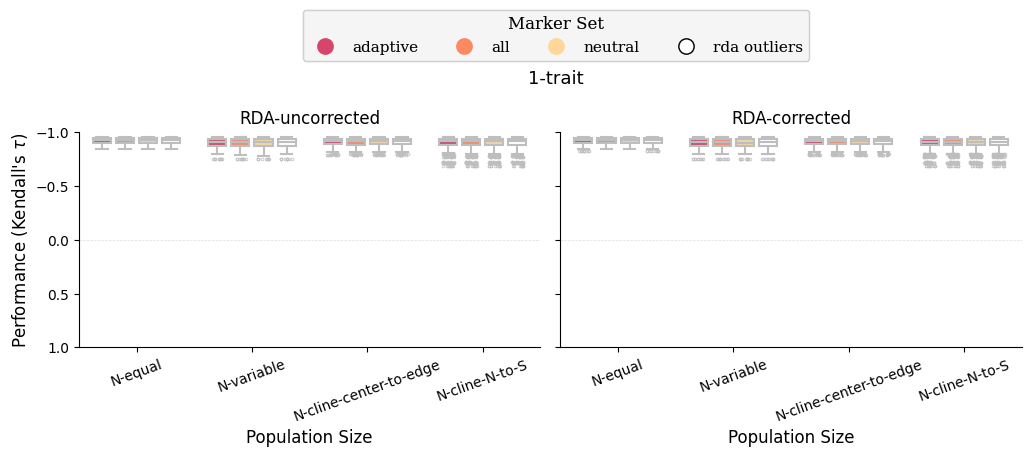

x = 'migration' text_x = 0.475


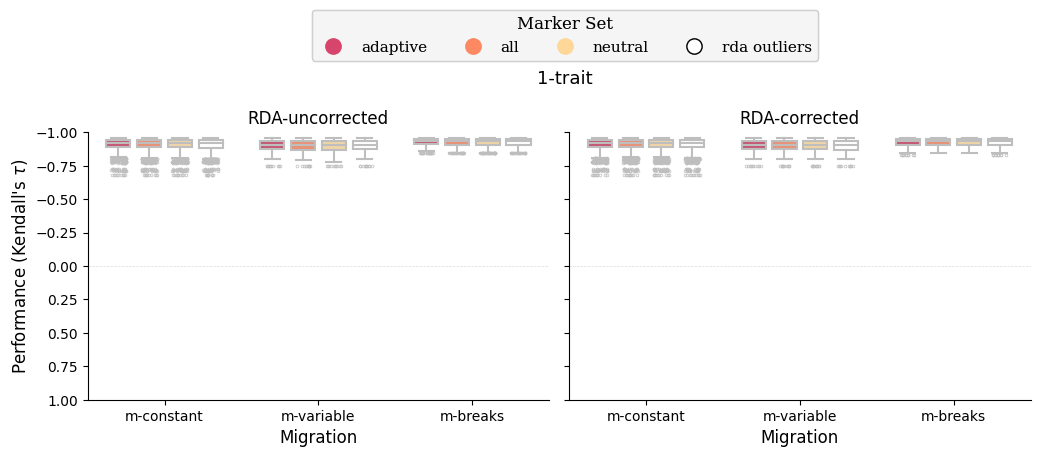

x = 'program' text_x = 0.43


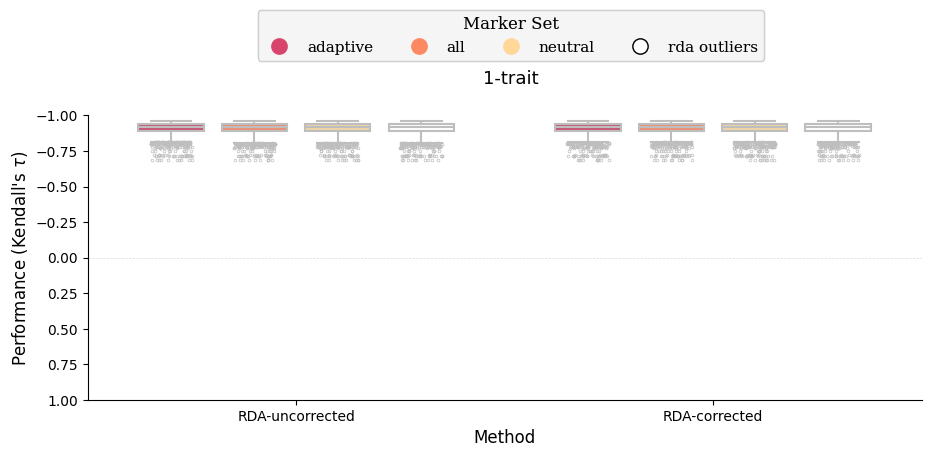

x = 'demography' text_x = 0.475


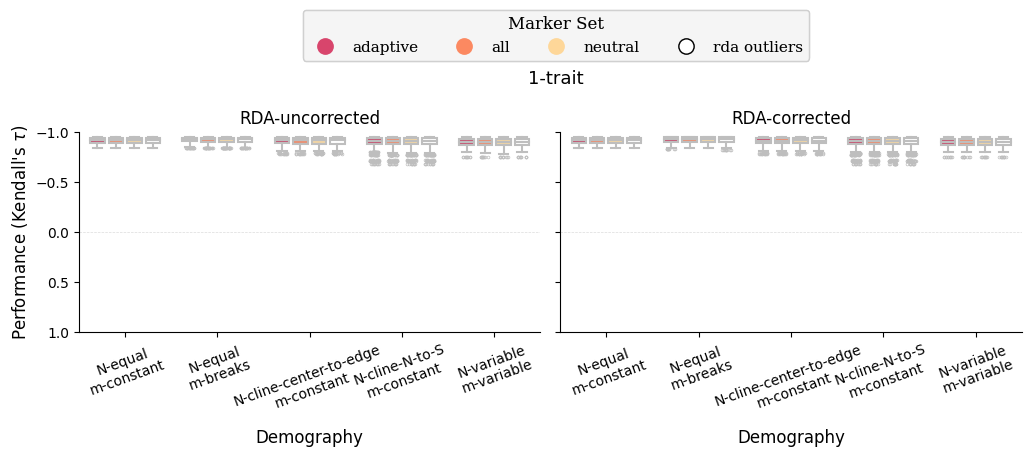

In [58]:
plot_marker_comparisons(
    rda_scores[rda_scores.plevel=='1-trait'],
#     mvp.get_1trait_data(rda_scores, remove_rda_outliers=False),
    ntraits='1-trait',
    ignore=['pleio', 'slevel', 'noncausal_env']
)

#### 2-trait sims (within-landscape validation)

x = 'landscape' text_x = 0.475


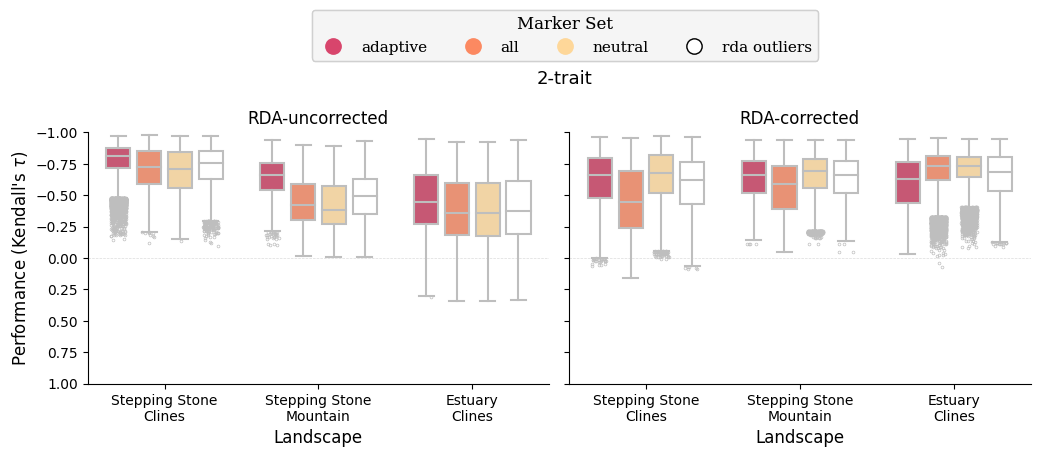

x = 'glevel' text_x = 0.475


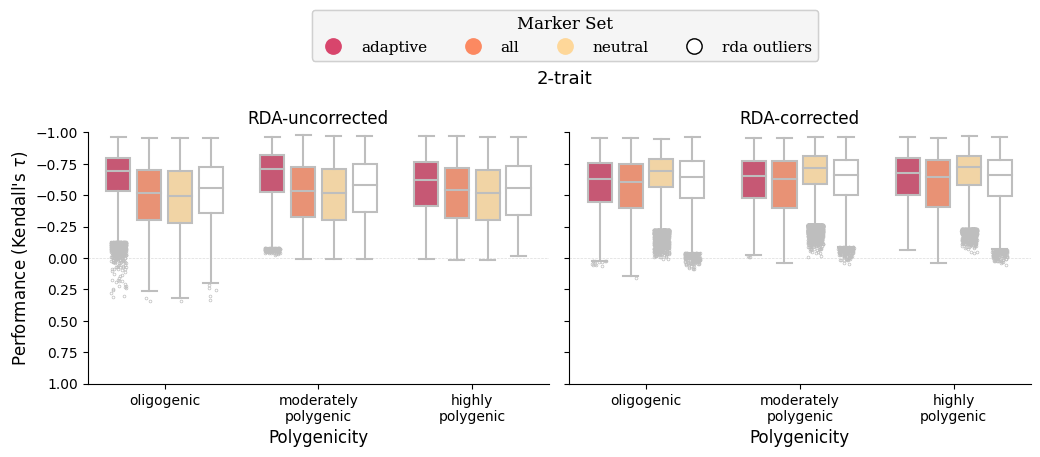

x = 'pleio' text_x = 0.475


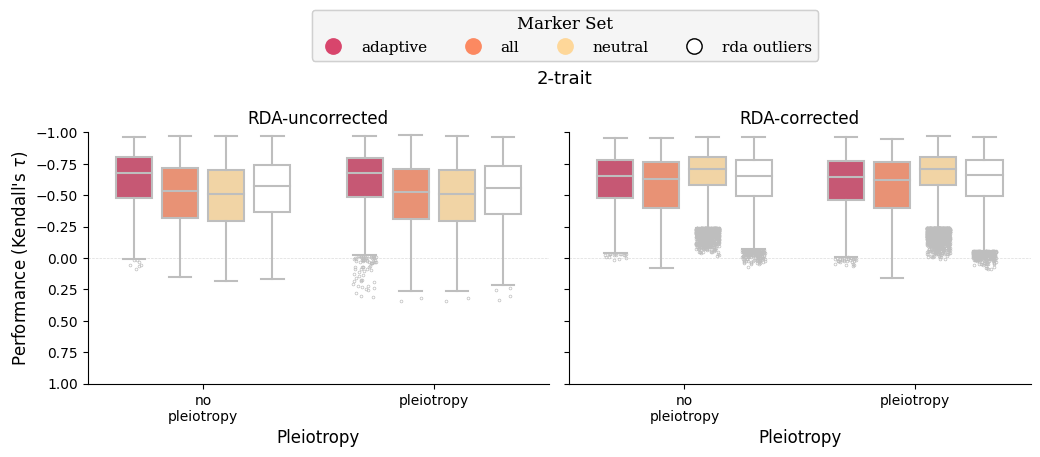

x = 'slevel' text_x = 0.475


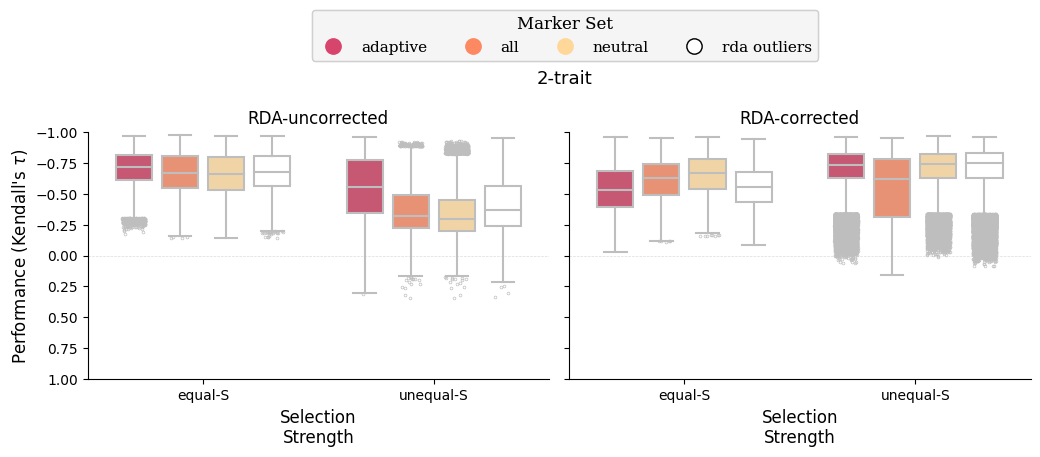

x = 'popsize' text_x = 0.475


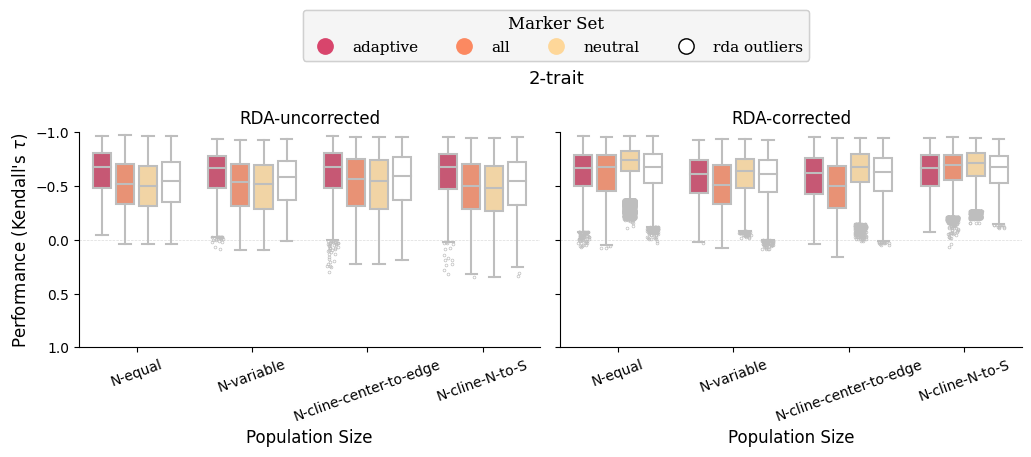

x = 'migration' text_x = 0.475


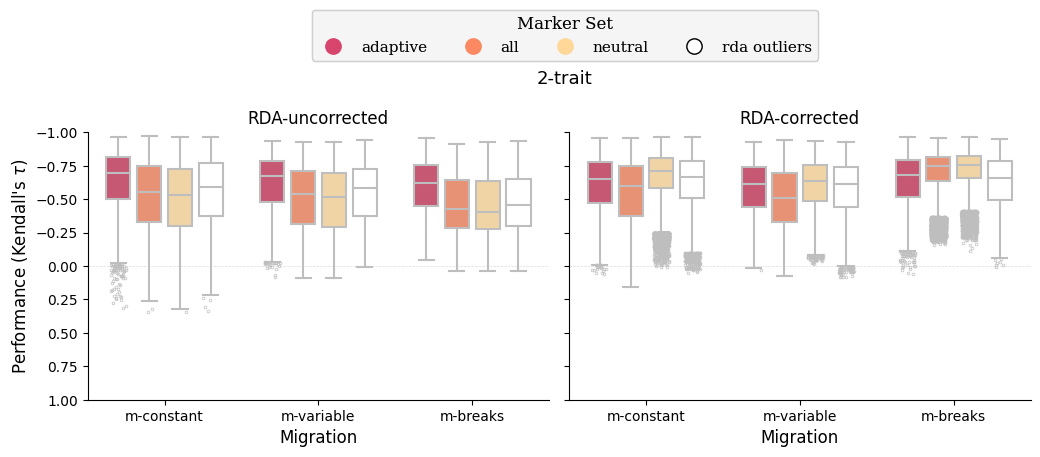

x = 'program' text_x = 0.43


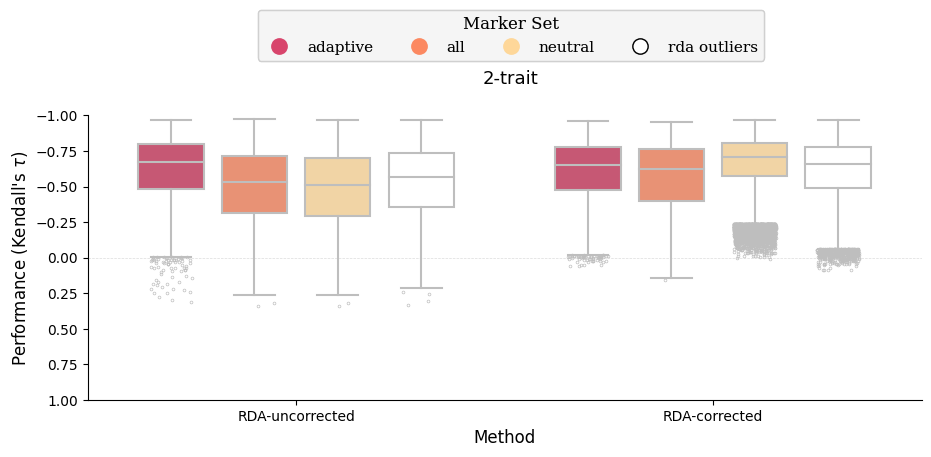

x = 'demography' text_x = 0.475


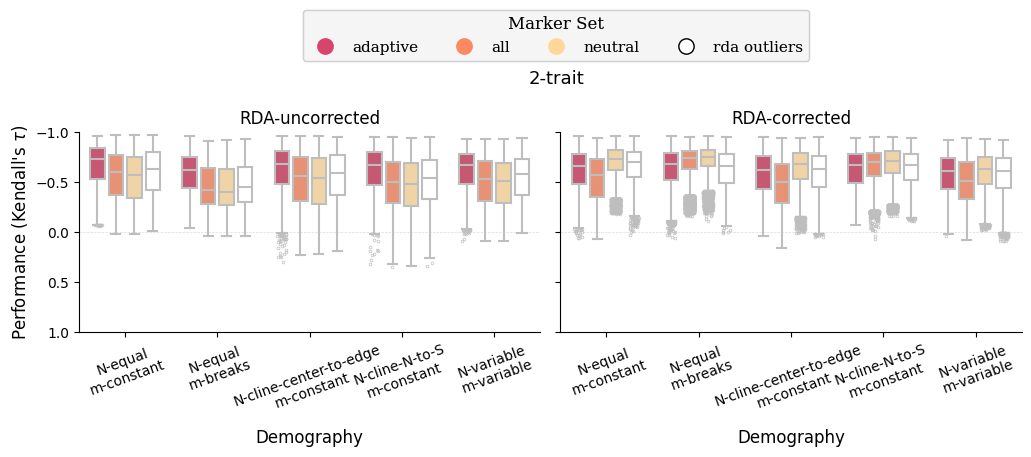

In [59]:
plot_marker_comparisons(
    rda_scores[rda_scores.plevel=='2-trait'],
    ntraits='2-trait',
    ignore=['noncausal_env']
)

<a id='withinstruct'></a>
### compare structure-corrected vs uncorrected (within-landscape validation)

[top](#home)

In [12]:
def plot_correction_comparisons(data, ignore=[], one_trait=False):
#     ignore.append('program')
    
    for x, x_order in mvp.hue_order.items():
        if x in ignore:
            continue

        g = sns.catplot(data=data,
                        x=x,
                        y='score',
                        order=x_order if x != 'program' else rda_program_order,
                        hue='program',
                        hue_order=['rda-nocorr', 'rda-structcorr'],
                        **mvp.boxplot_kwargs,
                        kind='box',
                   )
        
        g.figure.set_size_inches(12, 4)
        
        g.figure.suptitle(x=0.55, y=1.08, t='1-trait' if one_trait is True else '2-trait', fontsize=13)
        
        mvp.add_legend(g.figure, color_by='program', one_trait=one_trait,
                       loc='upper center', bbox_to_anchor=(0.55, 1.25), only_rda=True, ncol='auto'
                      )
        
        g.set_axis_labels(mvp.factor_names[x], "Performance (Kendall's $\\tau$)", fontsize=12)
        
        mvp.update_ticklabels(g.axes.flat[0], replace=(' - ', '\n'))


        adjust_box_widths(list(g.axes[0]), 0.8)
        mvp.jitter_fliers(g)

        g.set(ylim=(1, -1))

        for ax in g.axes[0]:
            ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
            
        g.tight_layout

        plt.show()

    pass

#### 1-trait sims  (within-landscape validation)

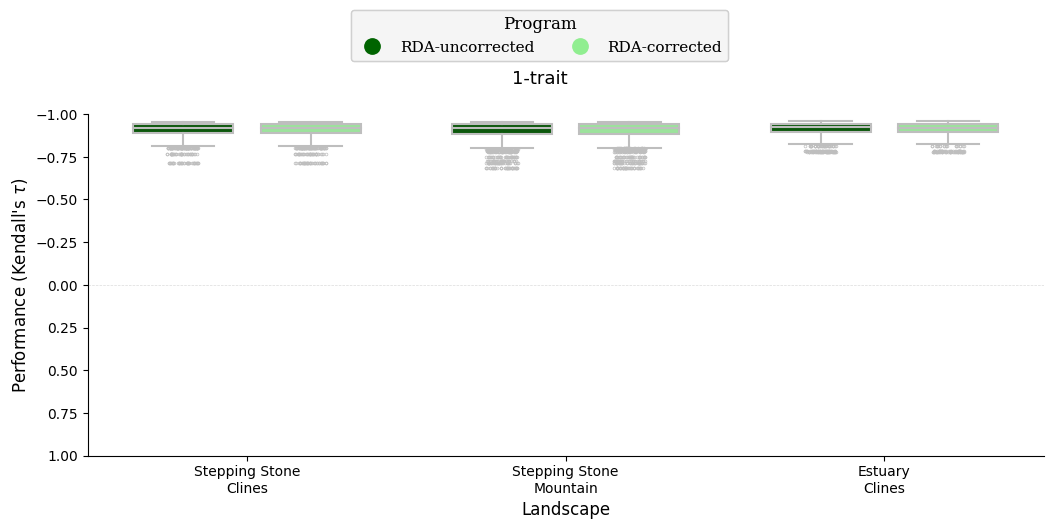

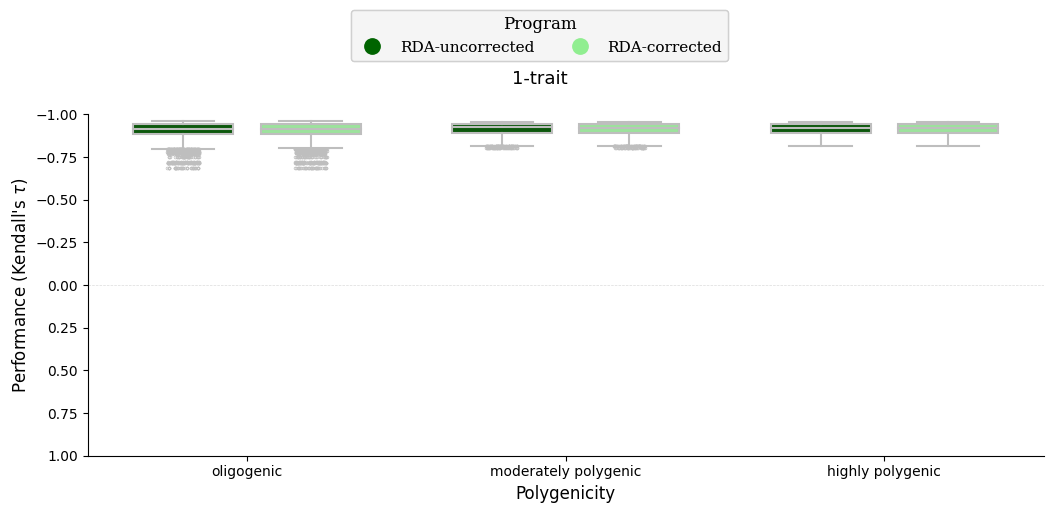

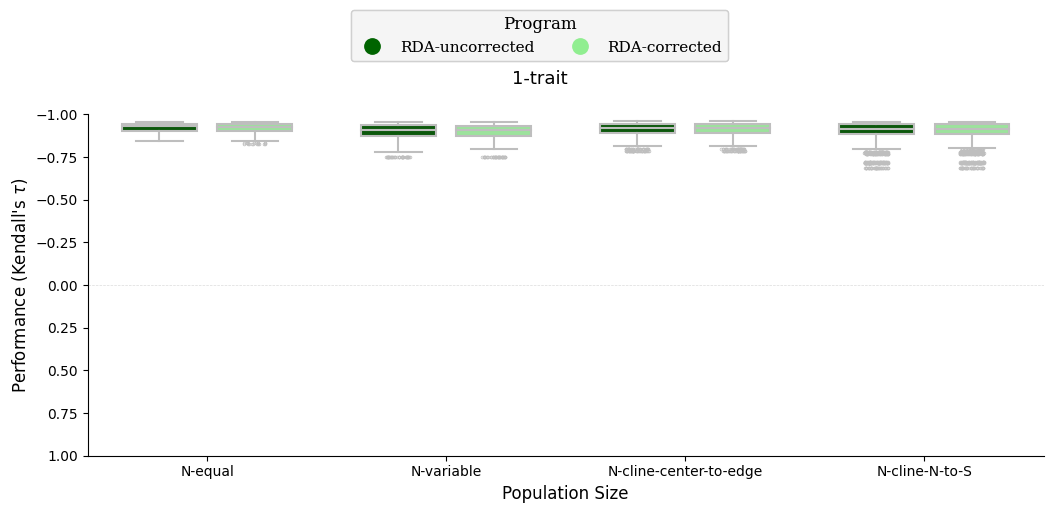

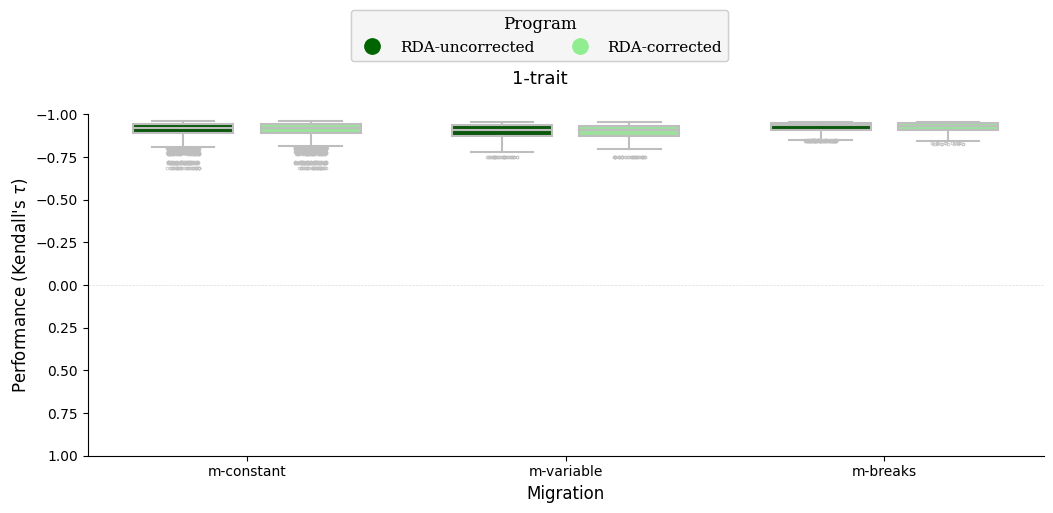

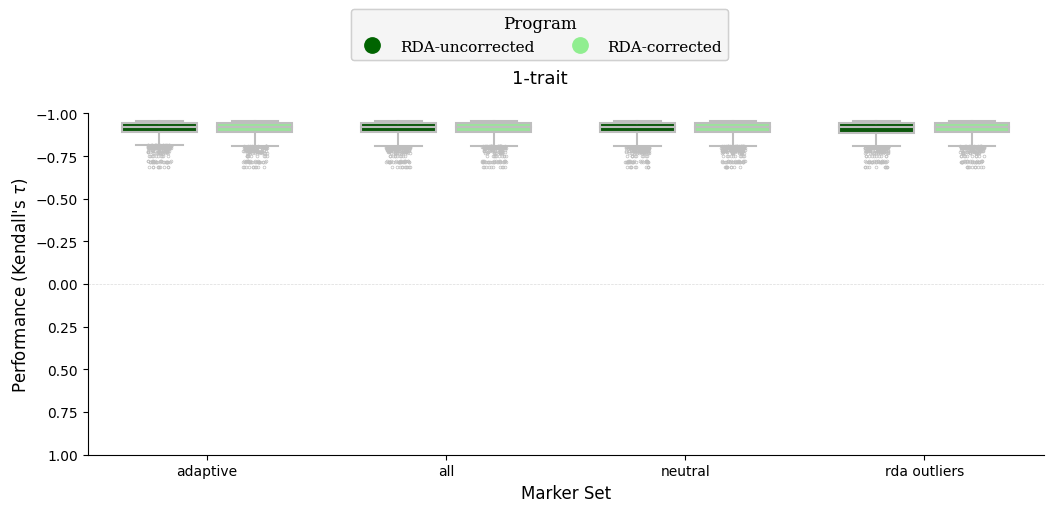

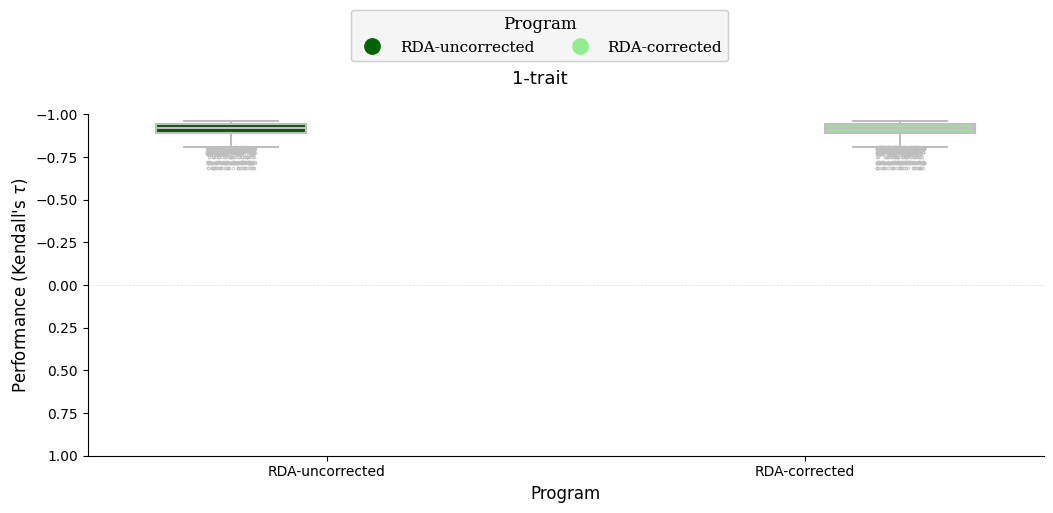

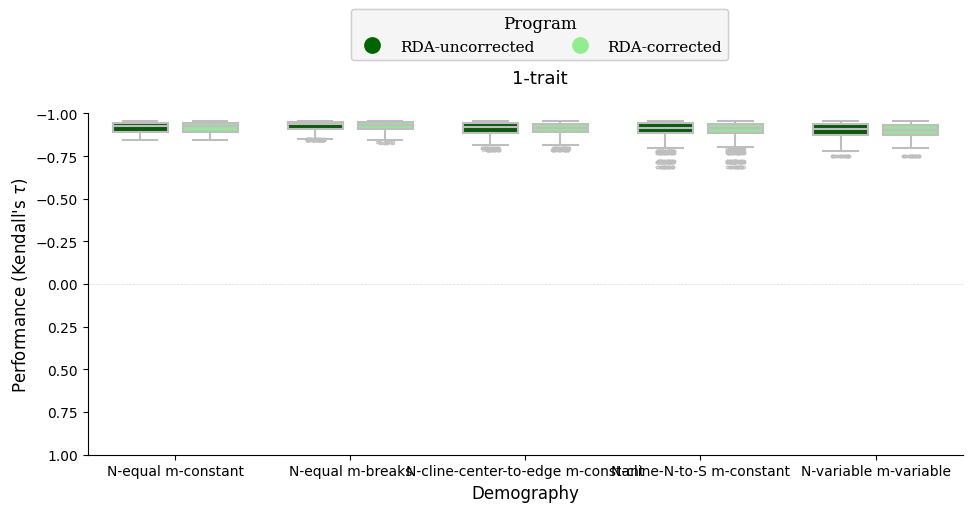

In [13]:
plot_correction_comparisons(
    rda_scores[rda_scores.plevel=='1-trait'],
    ntraits='1-trait',
    ignore=['pleio', 'slevel', 'noncausal_env']
)

#### 2-trait sims (within-landscape validation)

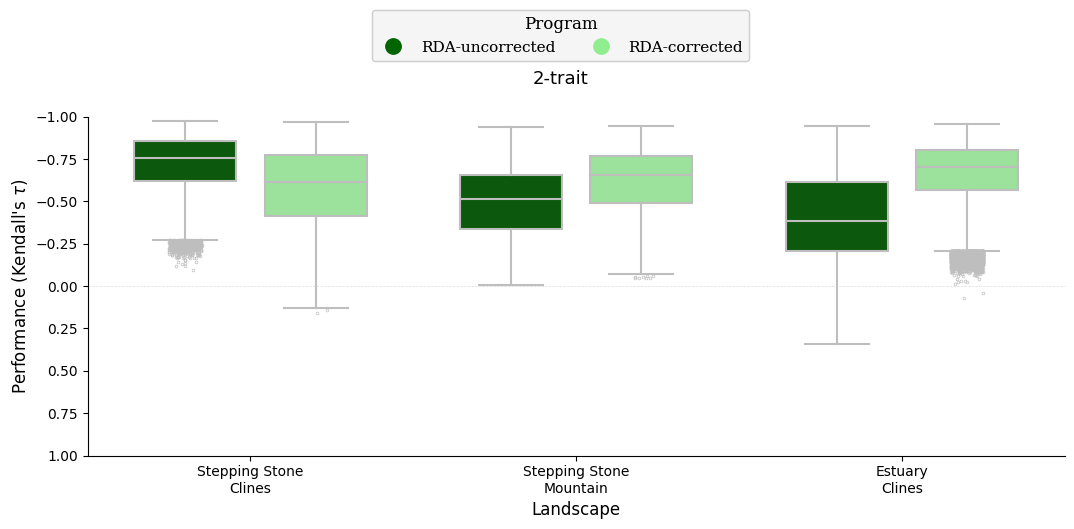

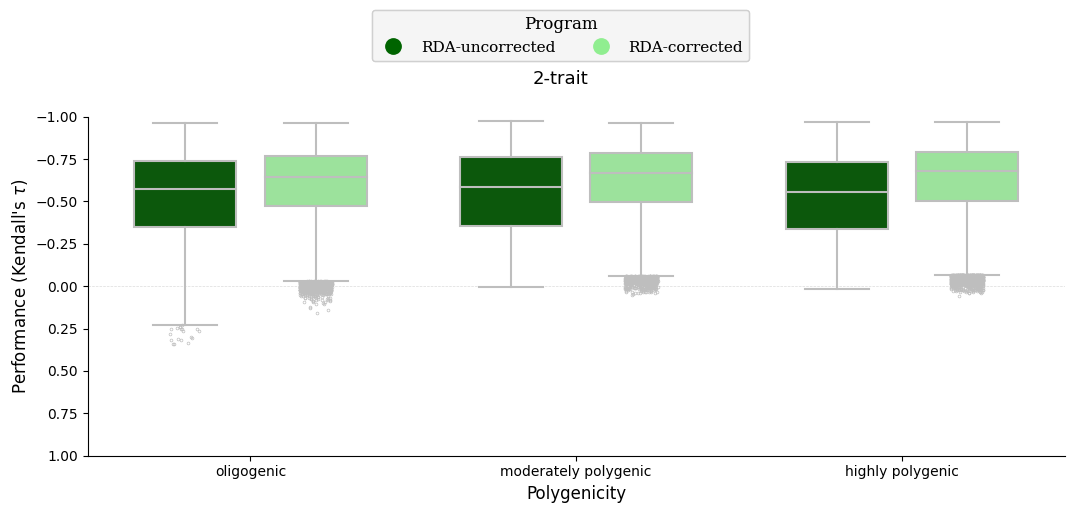

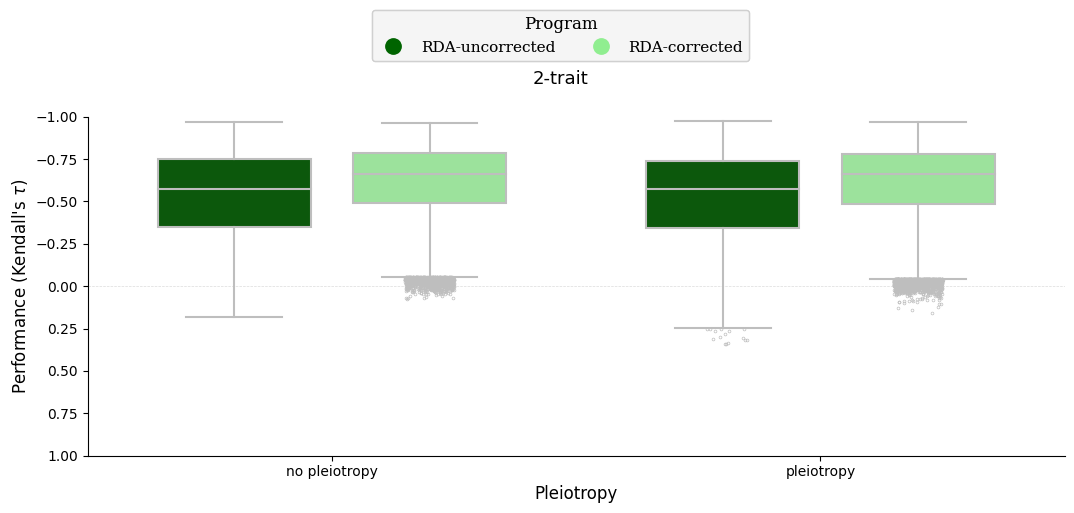

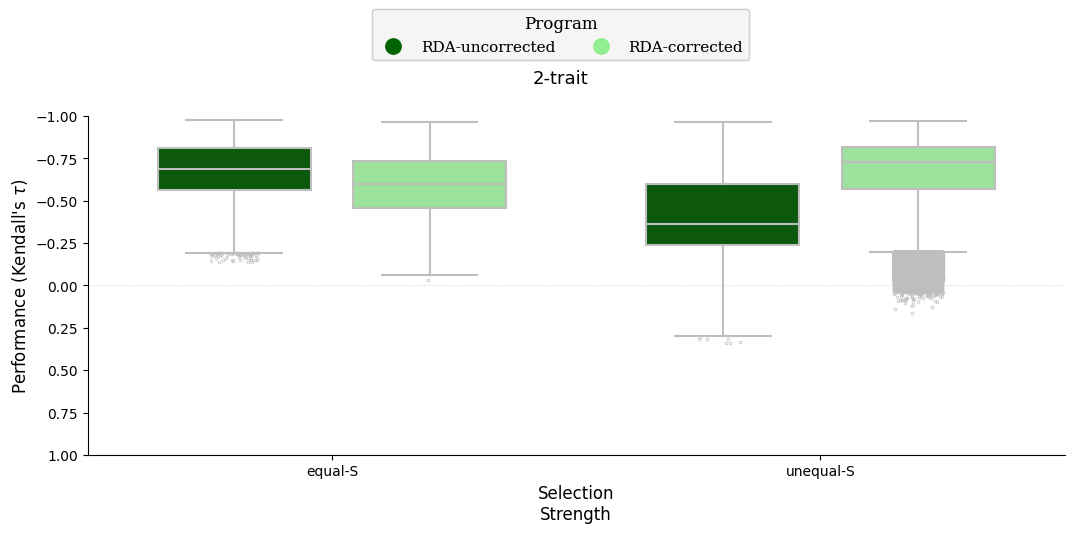

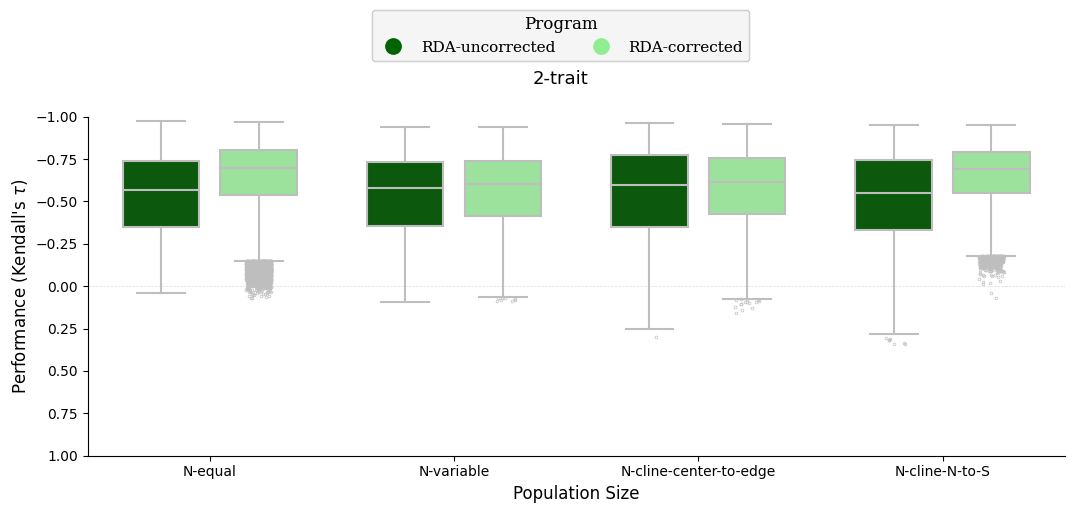

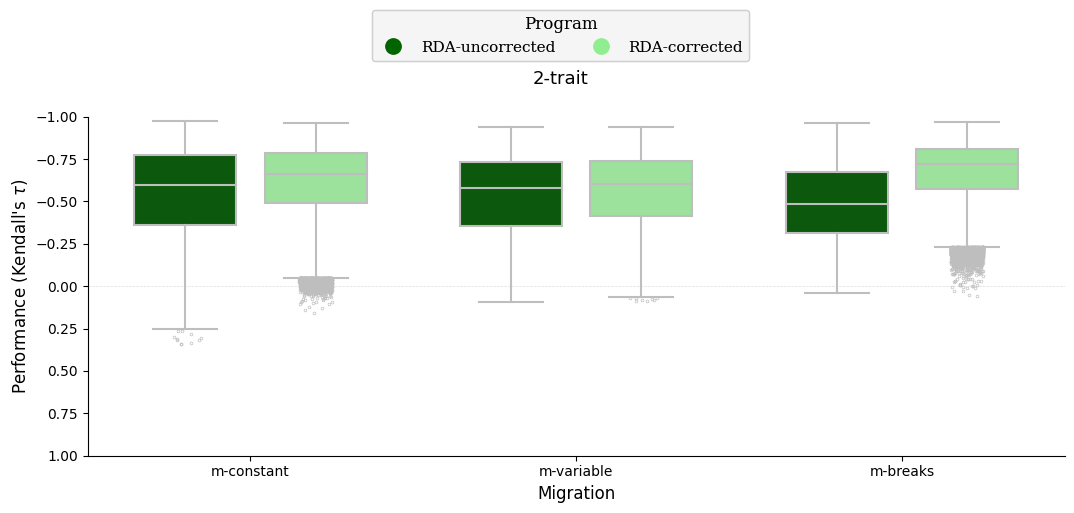

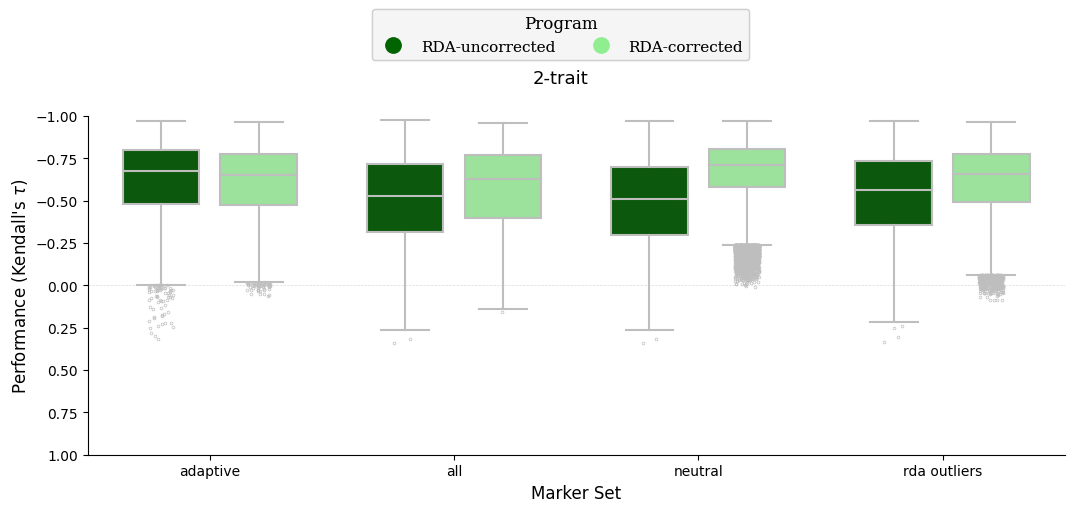

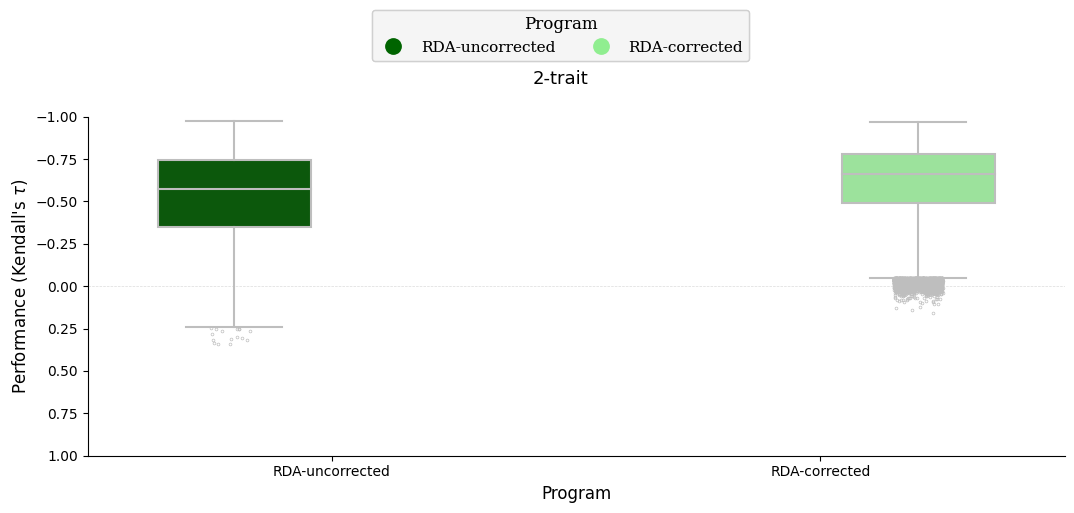

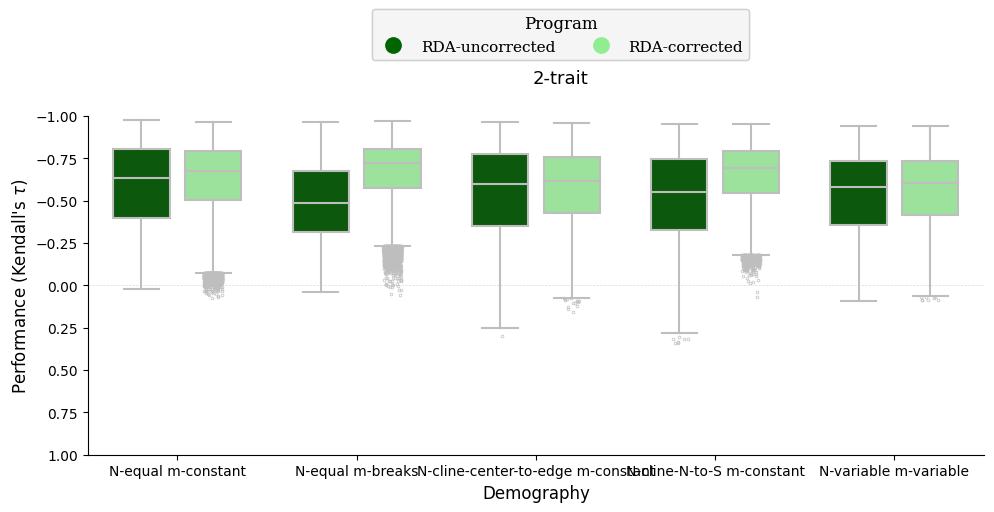

In [14]:
plot_correction_comparisons(
    rda_scores[rda_scores.plevel=='2-trait'],
    ntraits='2-trait',
    ignore=['noncausal_env']
)

<a id='climate'></a>
# climate outlier scores

[top](#home)

<a id='climget'></a>
### get scores for RDA

In [15]:
rda_scores.marker_set.unique()

array(['adaptive', 'all', 'neutral', 'rda outliers'], dtype=object)

In [16]:
climdir = '/home/b.lind/offsets/climate_outlier_runs'

clim_rundirs = fs(climdir, startswith='run', dirs=True)

clim_rundirs

['/home/b.lind/offsets/climate_outlier_runs/run_20220919_0-225',
 '/home/b.lind/offsets/climate_outlier_runs/run_20220919_1125-1350',
 '/home/b.lind/offsets/climate_outlier_runs/run_20220919_1350-1575',
 '/home/b.lind/offsets/climate_outlier_runs/run_20220919_1575-1800',
 '/home/b.lind/offsets/climate_outlier_runs/run_20220919_225-450',
 '/home/b.lind/offsets/climate_outlier_runs/run_20220919_450-675',
 '/home/b.lind/offsets/climate_outlier_runs/run_20220919_675-900',
 '/home/b.lind/offsets/climate_outlier_runs/run_20220919_900-1125']

In [17]:
validations = []
for d in pbar(clim_rundirs):
    run = op.basename(d).split("_")[-1]

    f = op.join(d, 'rda/validation/climate_outlier_validation_scores.txt')

    if op.exists(f):
        df = pd.read_table(f).copy()
        assert len(df['program'].unique()) == 1

        df['program'] = 'rda-' + df.structcorr
        df['run'] = run
        df['marker_set'] = df.marker_set.str.replace('rda_outliers', 'rda outliers')

        validations.append(df)

    else:
        print(f)
        
validation = pd.concat(validations)

validation['demography'] = validation['popsize'] + '_' + validation['migration']

# bcs_validation = mvp.get_bcs_dataframe(validation)

validation.head()

 62%|█████████▍     | 5/8 [00:00<00:00,  9.69it/s]

/home/b.lind/offsets/climate_outlier_runs/run_20220919_1350-1575/rda/validation/climate_outlier_validation_scores.txt
/home/b.lind/offsets/climate_outlier_runs/run_20220919_1575-1800/rda/validation/climate_outlier_validation_scores.txt


100%|███████████████| 8/8 [00:01<00:00,  6.74it/s]


,seed,ind_or_pooled,use_RDA_outliers,ntraits,structcorr,outlier_clim,score,block,glevel,plevel,pleio,slevel,landscape,popsize,migration,program,marker_set,run,demography
0,1231094,pooled,CAUSAL,ntraits-1,nocorr,0.00,-0.898220,all,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,rda-nocorr,adaptive,0-225,N-cline-center-to-edge_m-constant
1,1231094,pooled,CAUSAL,ntraits-1,nocorr,1.10,-0.953982,all,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,rda-nocorr,adaptive,0-225,N-cline-center-to-edge_m-constant
2,1231094,pooled,CAUSAL,ntraits-1,nocorr,1.50,-0.916093,all,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,rda-nocorr,adaptive,0-225,N-cline-center-to-edge_m-constant
3,1231094,pooled,CAUSAL,ntraits-1,nocorr,1.75,-0.872325,all,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,rda-nocorr,adaptive,0-225,N-cline-center-to-edge_m-constant
4,1231094,pooled,CAUSAL,ntraits-1,nocorr,2.00,-0.796332,all,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,rda-nocorr,adaptive,0-225,N-cline-center-to-edge_m-constant


<a id='climout'></a>
### compare marker sets

[top](#home)

#### 1-trait sims (climate outlier)

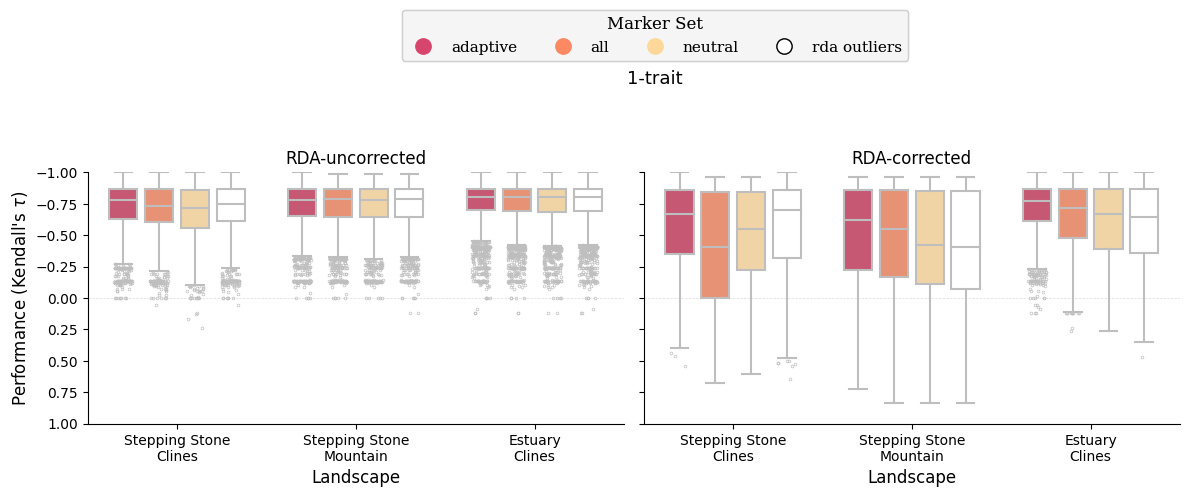

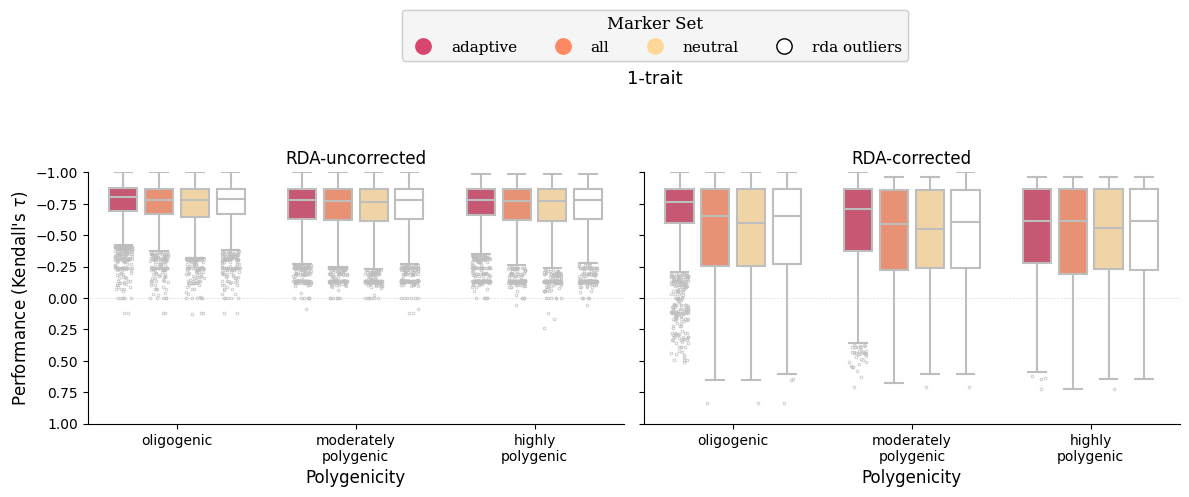

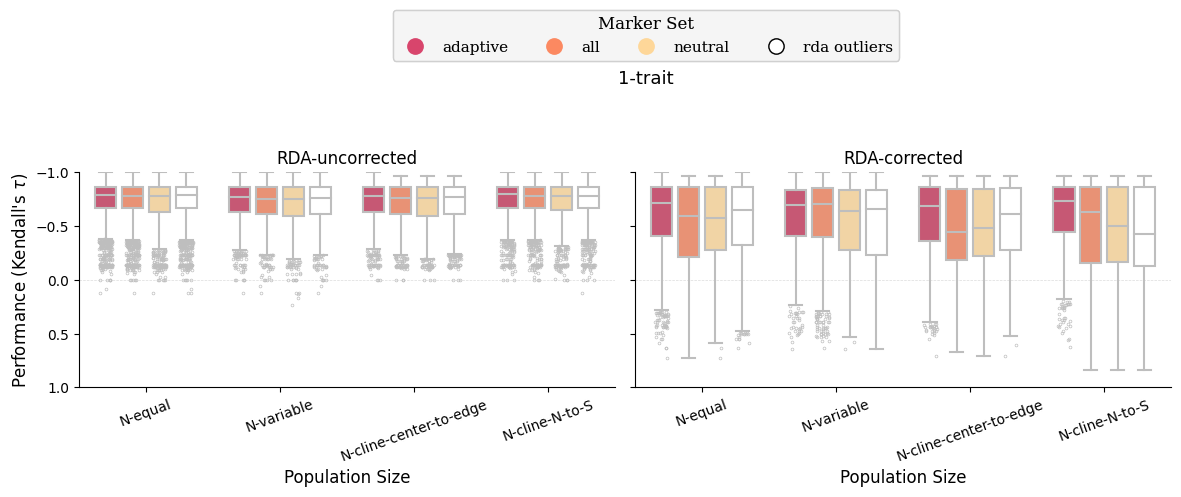

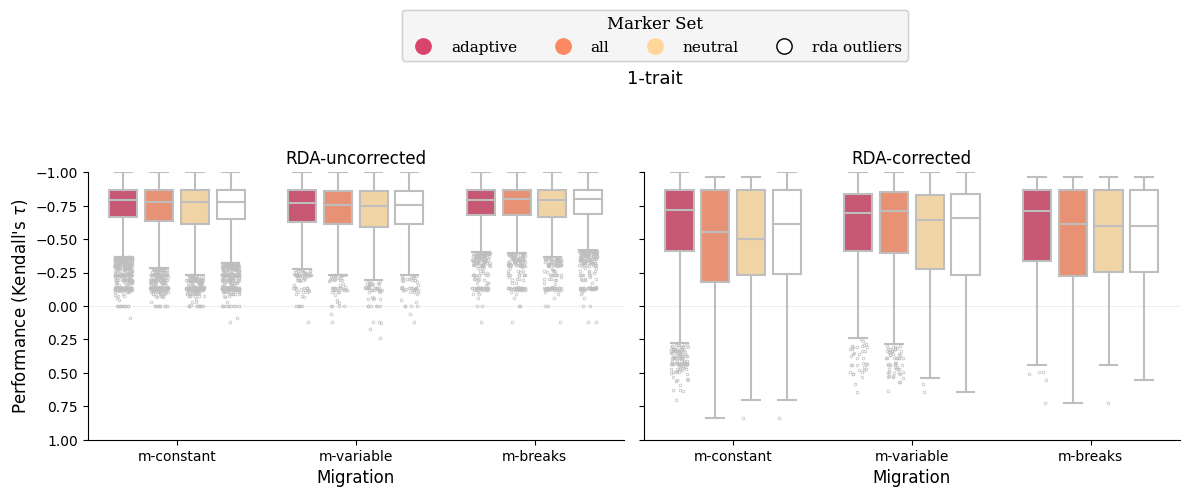

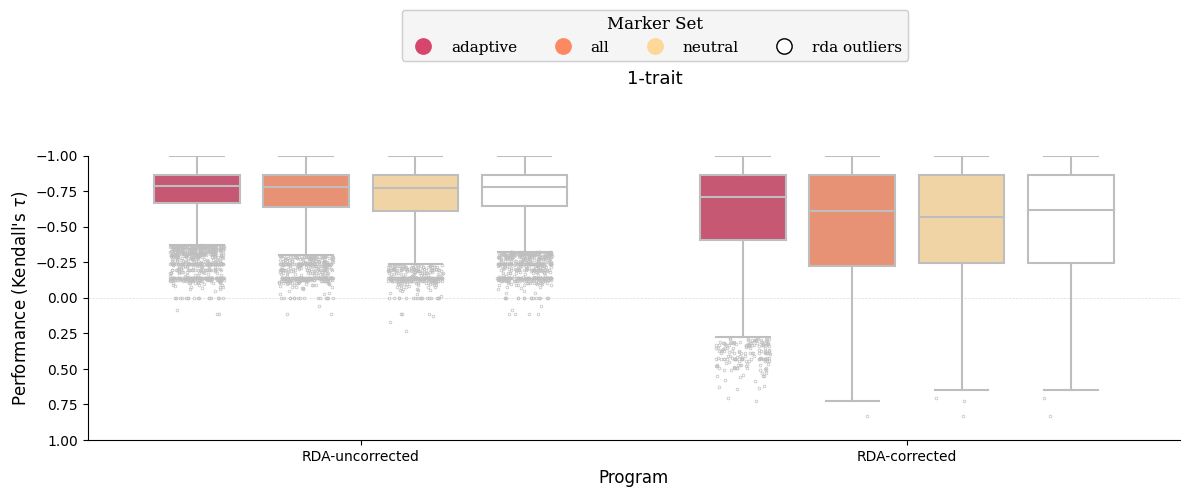

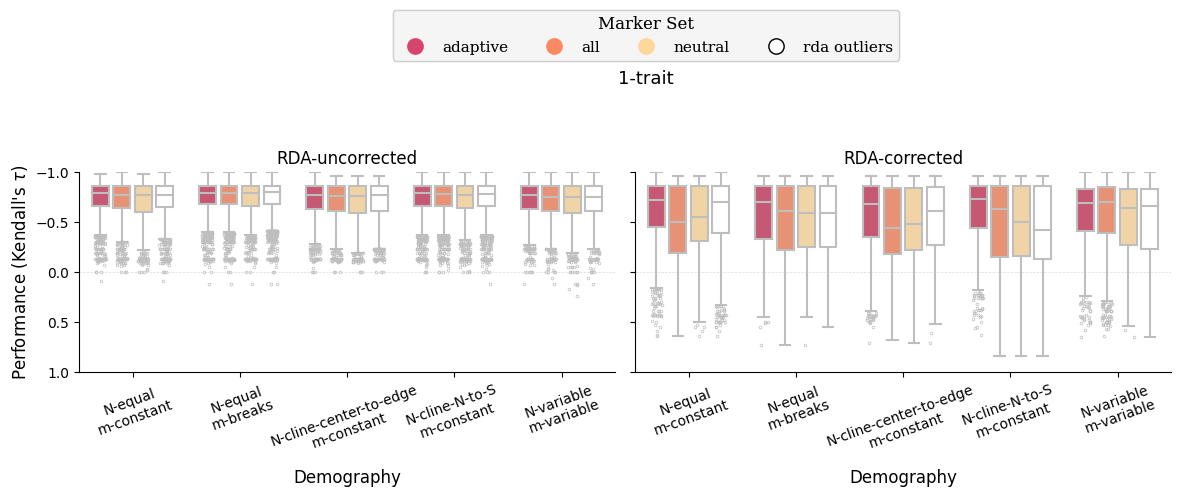

In [18]:
plot_marker_comparisons(
    validation[validation.plevel=='1-trait'],
    ignore=['noncausal_env', 'pleio', 'slevel'],
    ntraits='1-trait'
)

#### 2-trait sims (climate outlier)

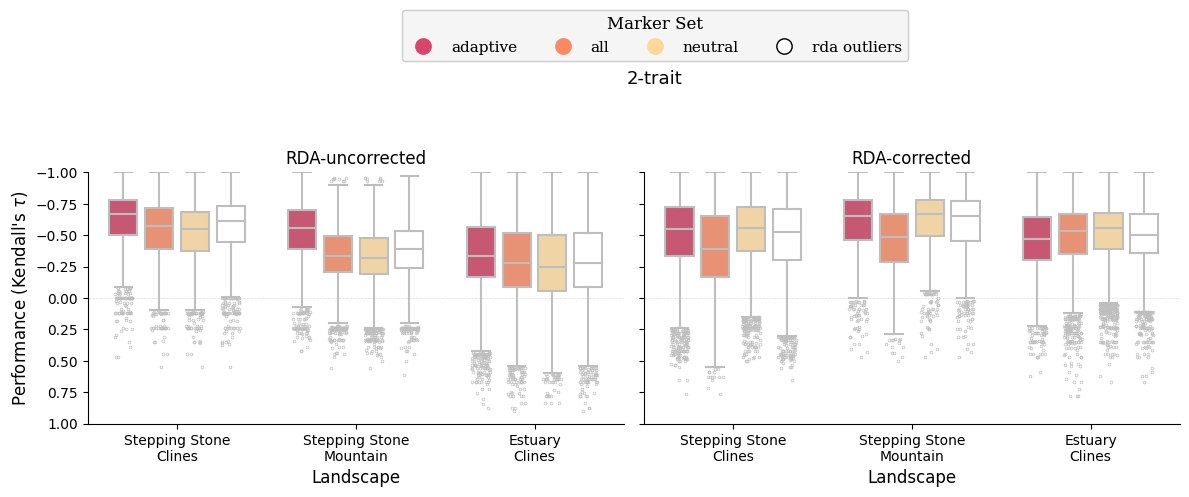

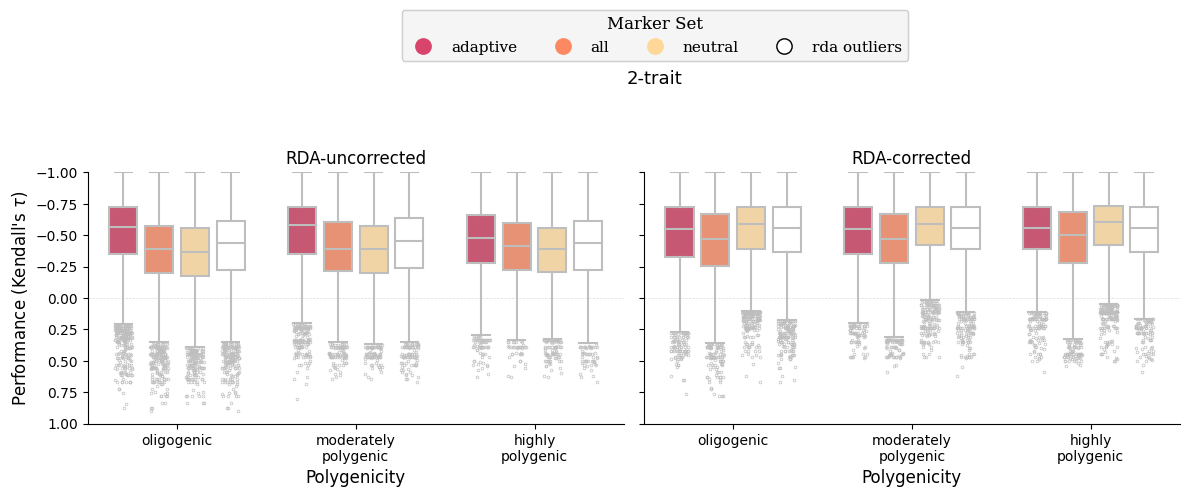

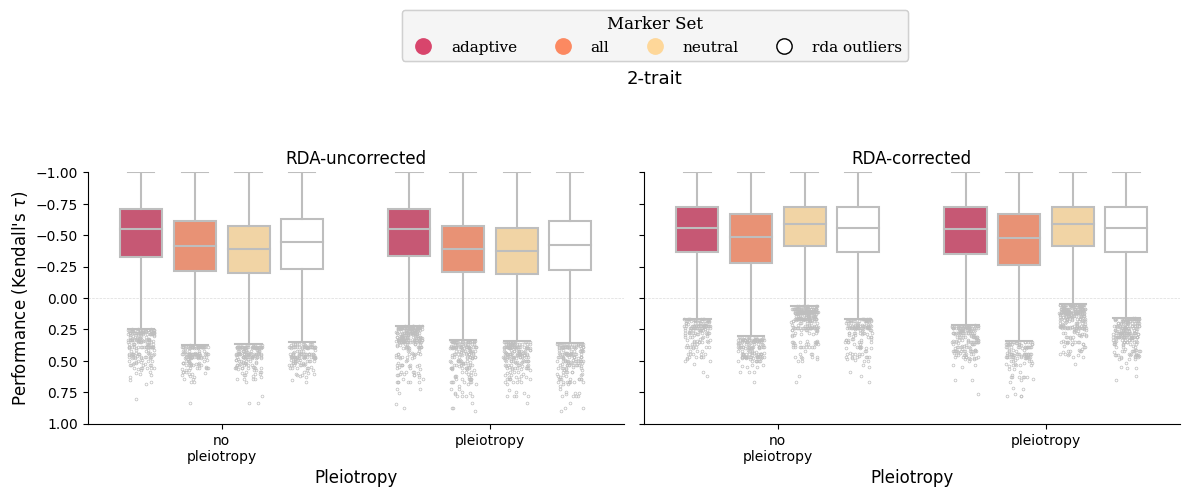

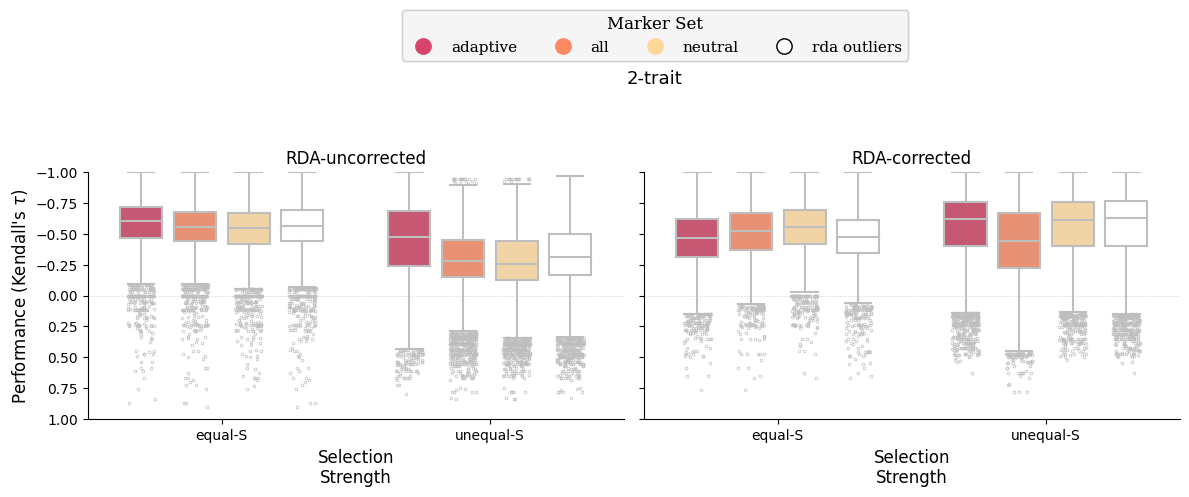

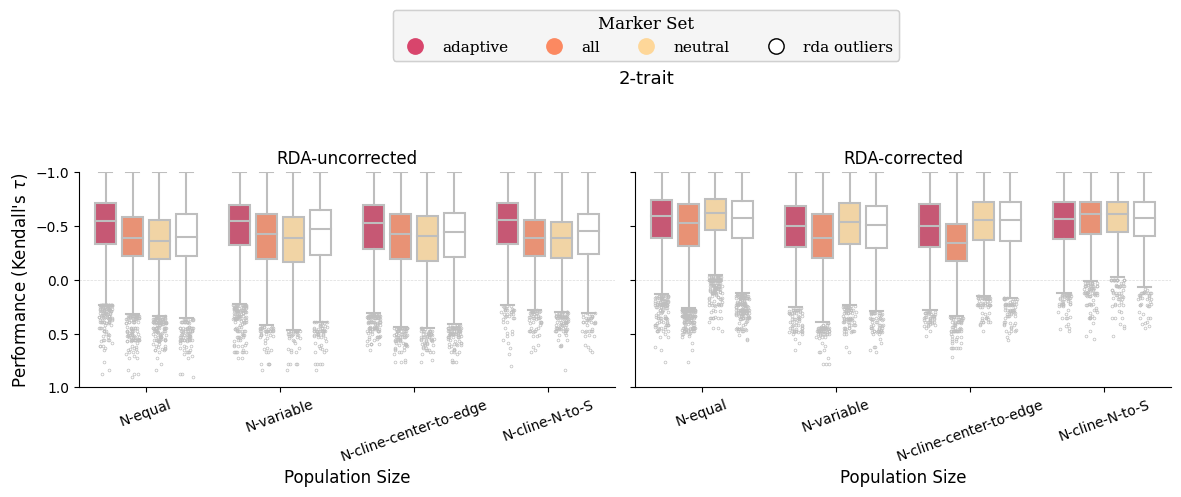

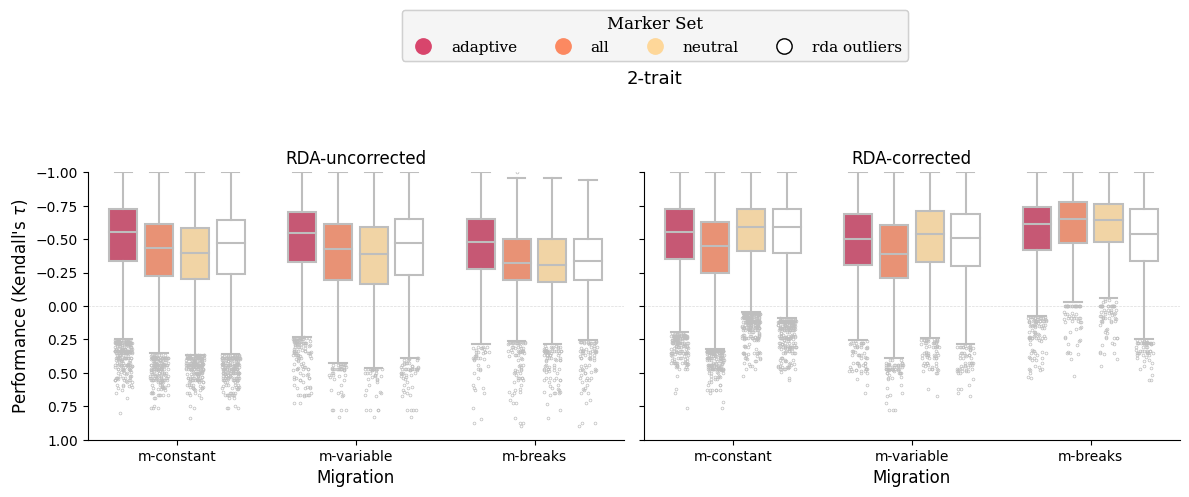

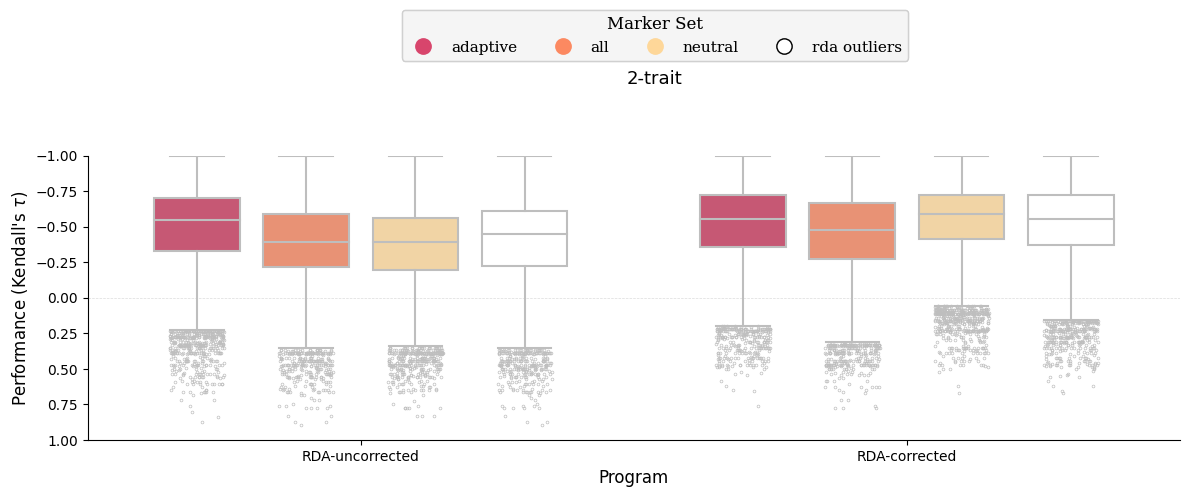

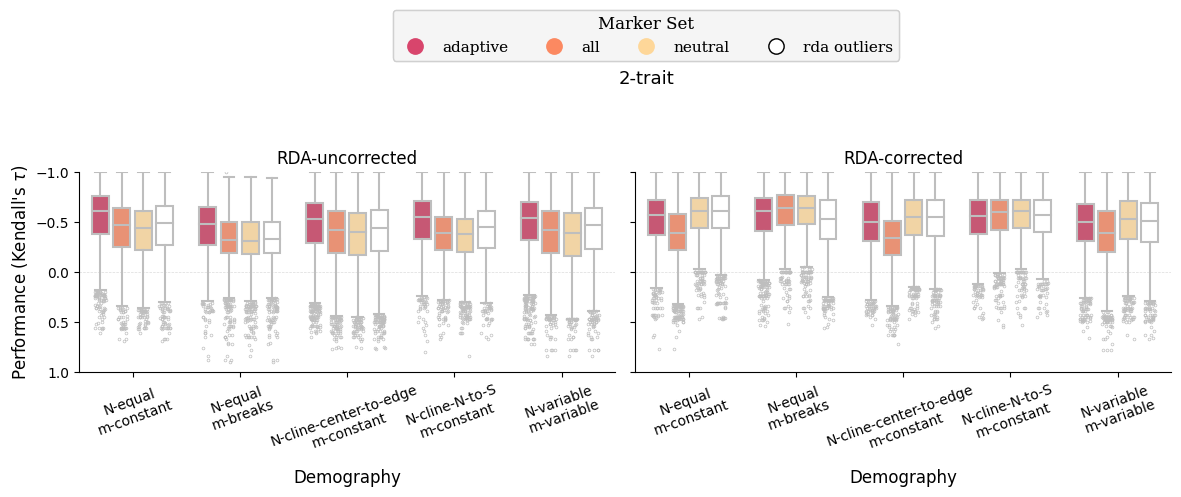

In [19]:
plot_marker_comparisons(
    validation[validation.plevel=='2-trait'],
    ntraits='2-trait',
    ignore=['noncausal_env']
)

<a id='climstruct'></a>
### compare structure-corrected vs uncorrected

[top](#home)

#### 1-trait sims (climate outlier)

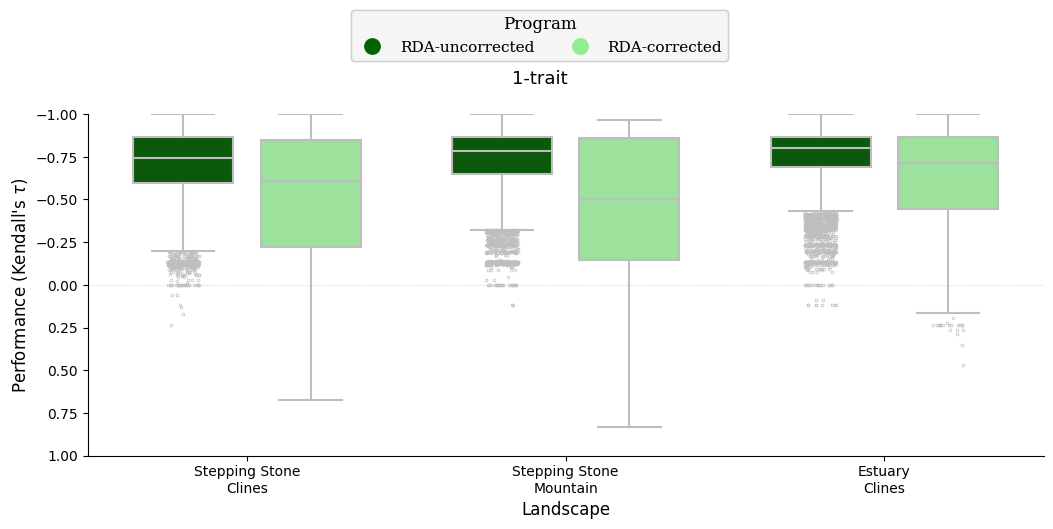

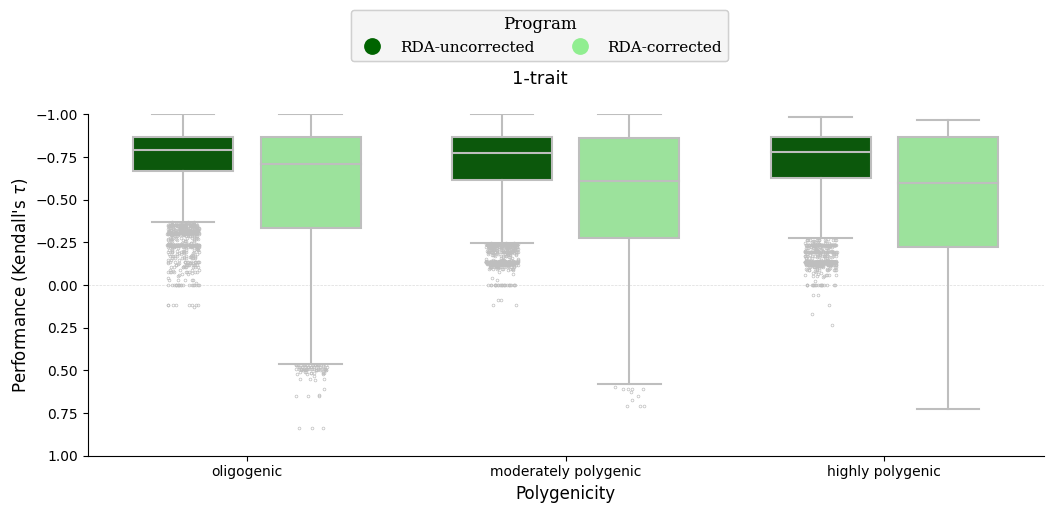

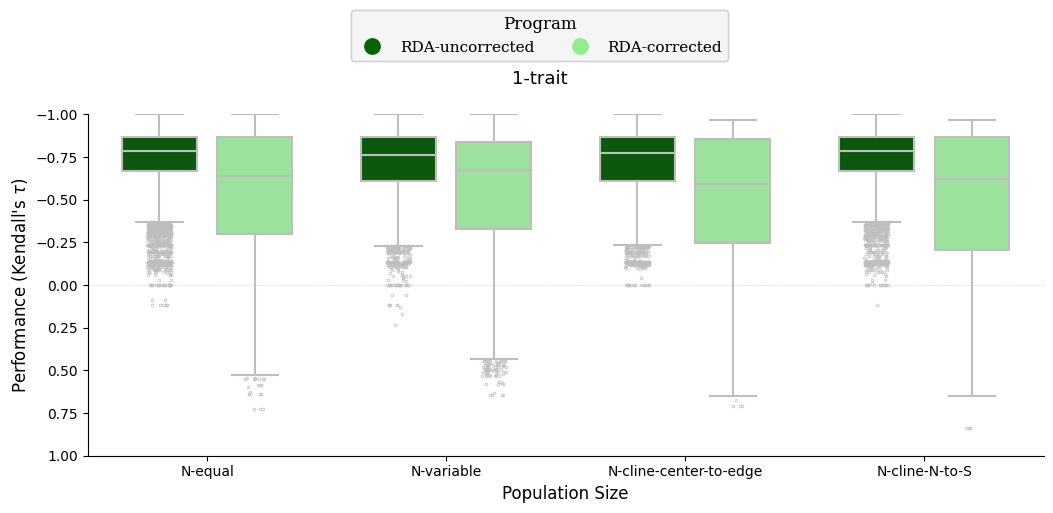

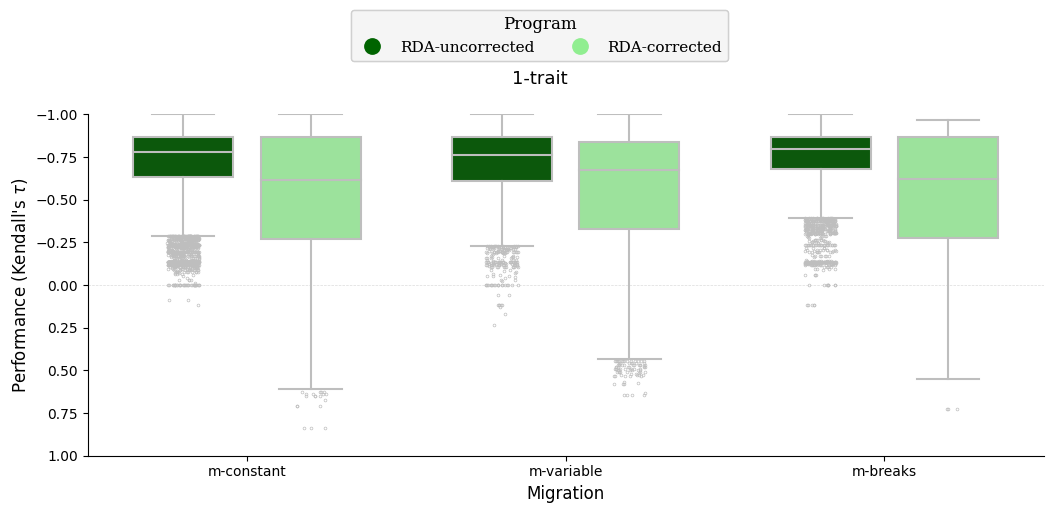

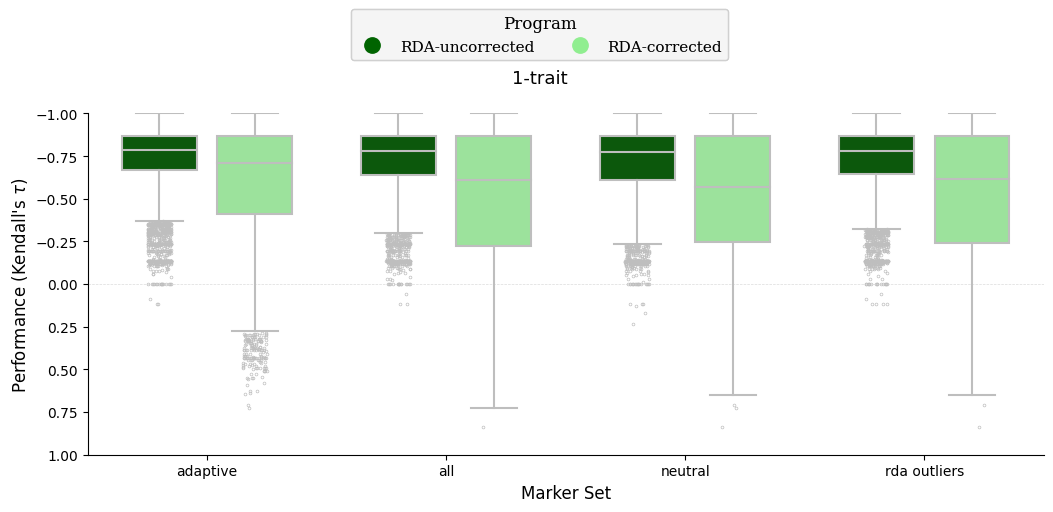

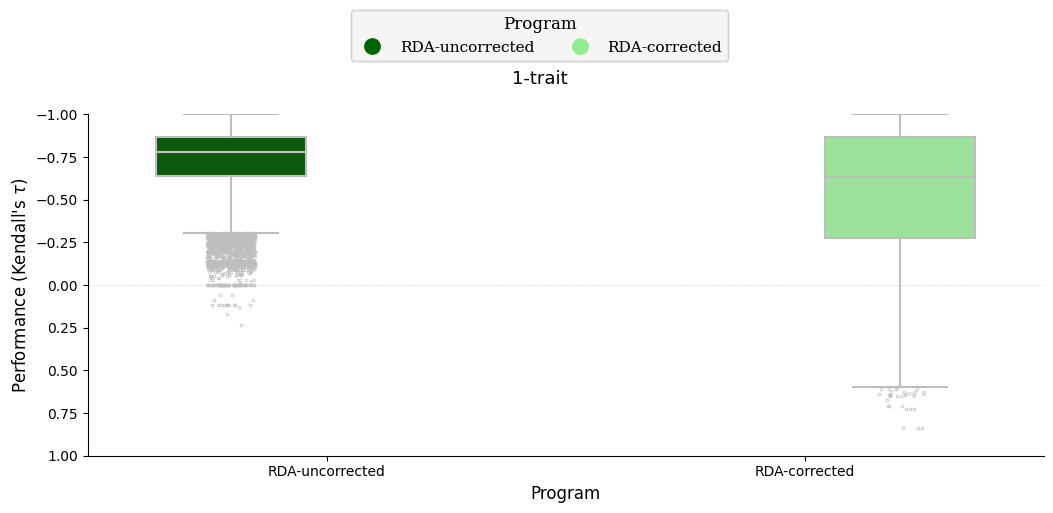

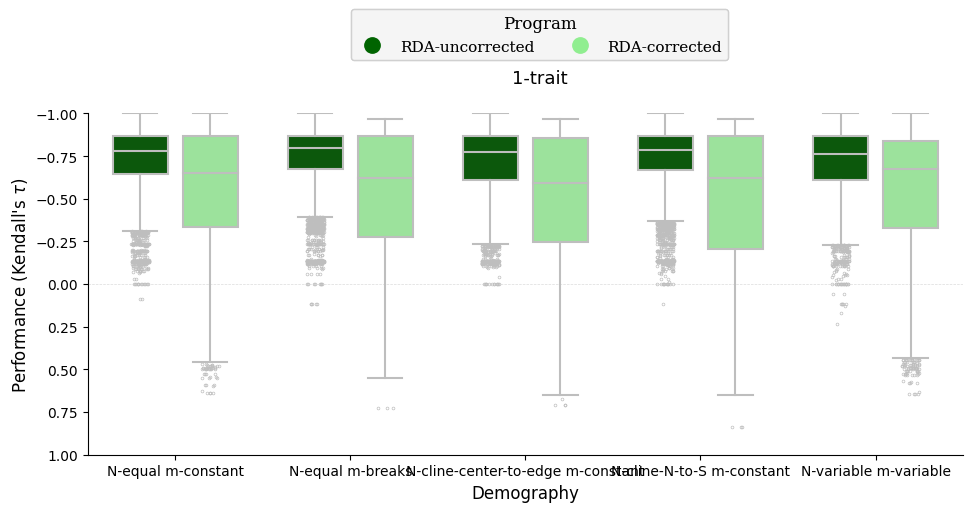

In [20]:
plot_correction_comparisons(
    validation[validation.plevel=='1-trait'],
    ignore=['noncausal_env', 'slevel', 'pleio'],
    ntraits='1-trait'
)

#### 2-trait sims (climate outlier)

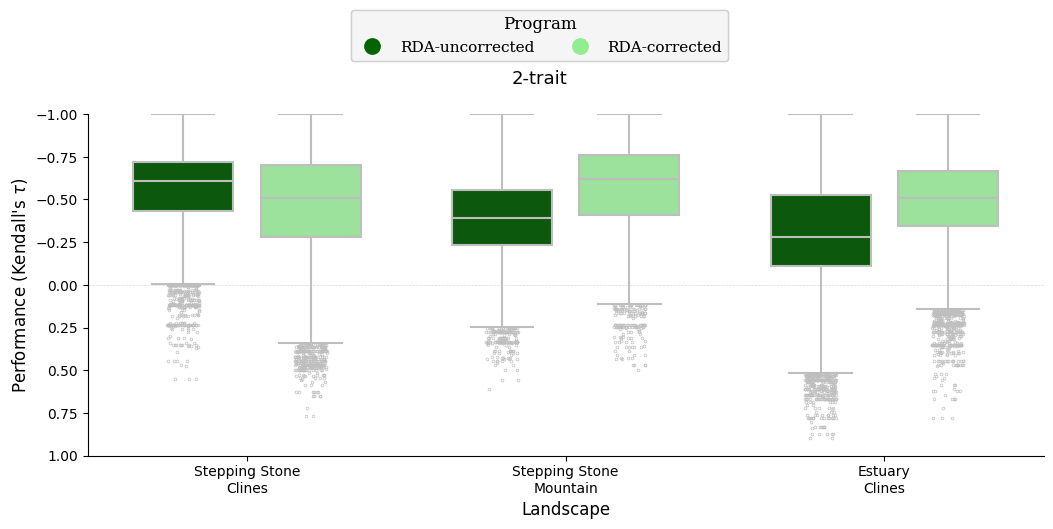

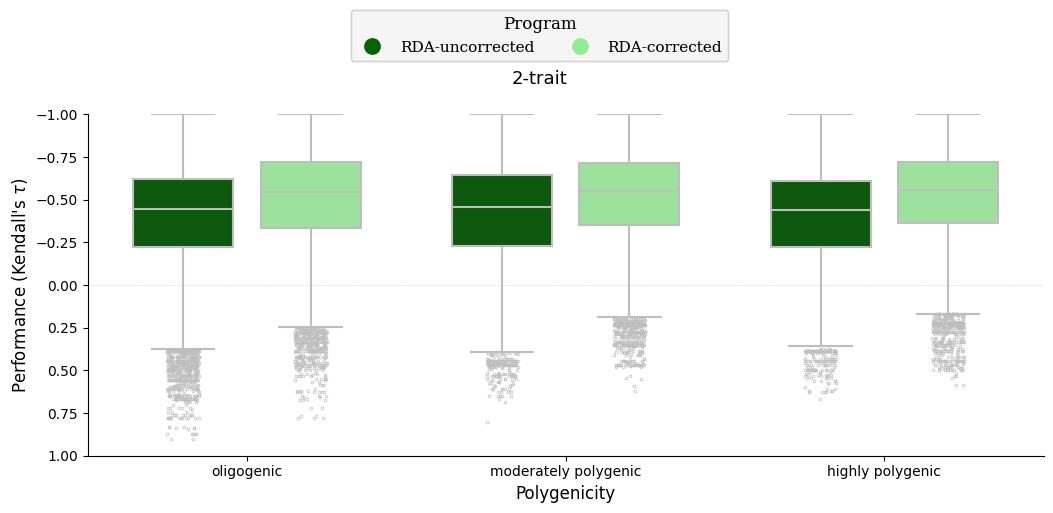

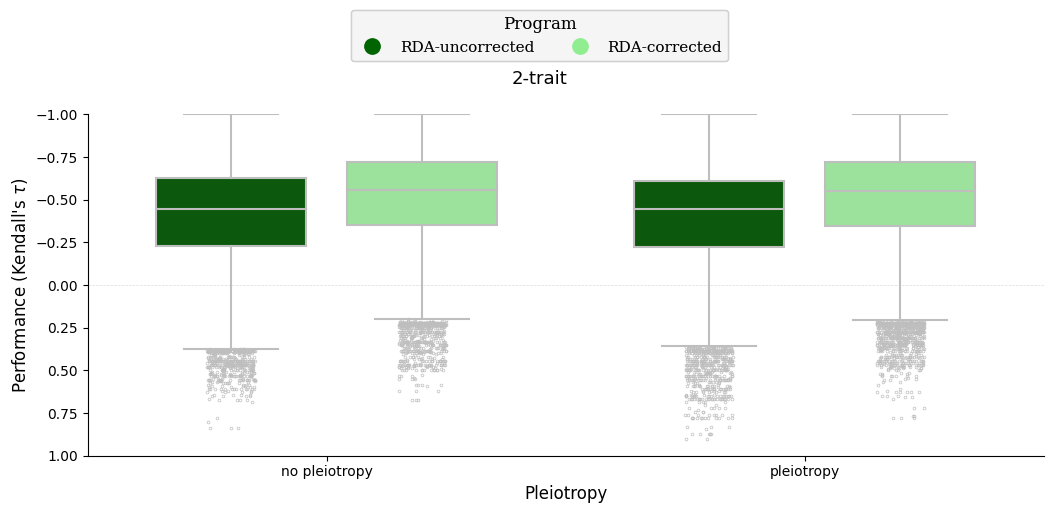

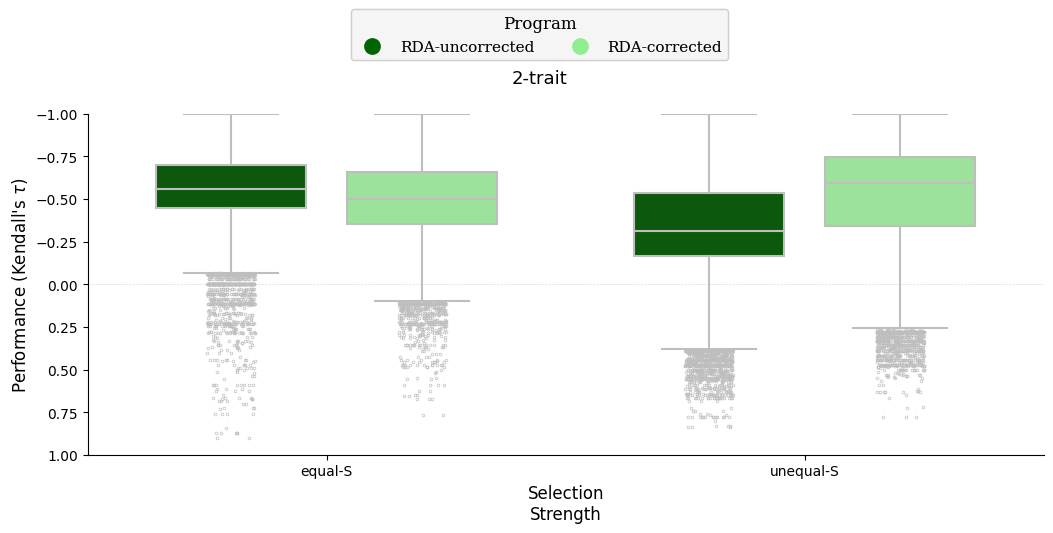

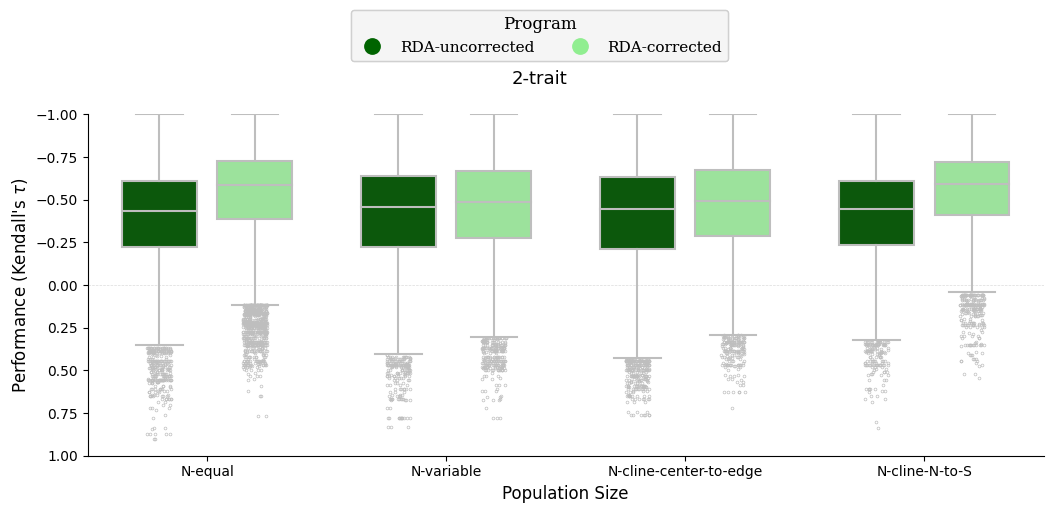

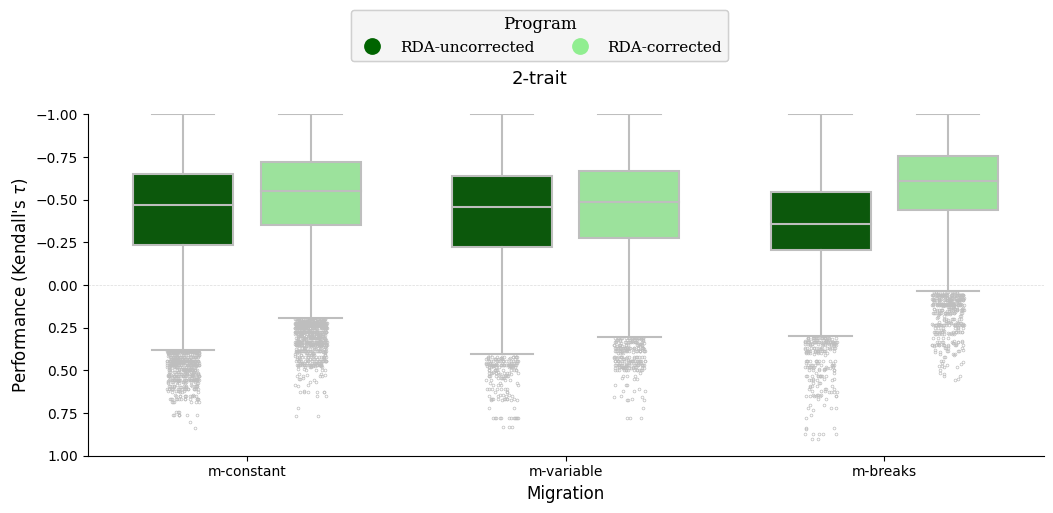

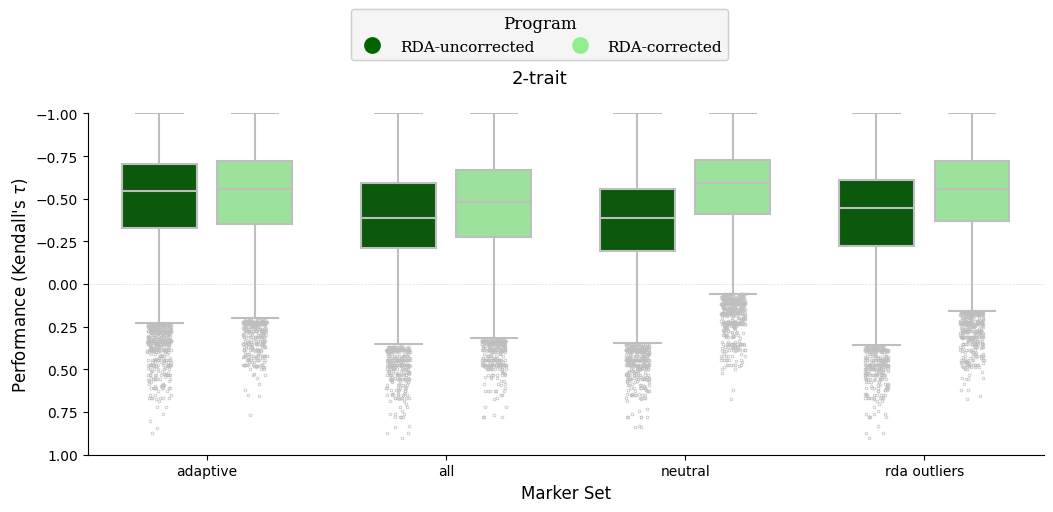

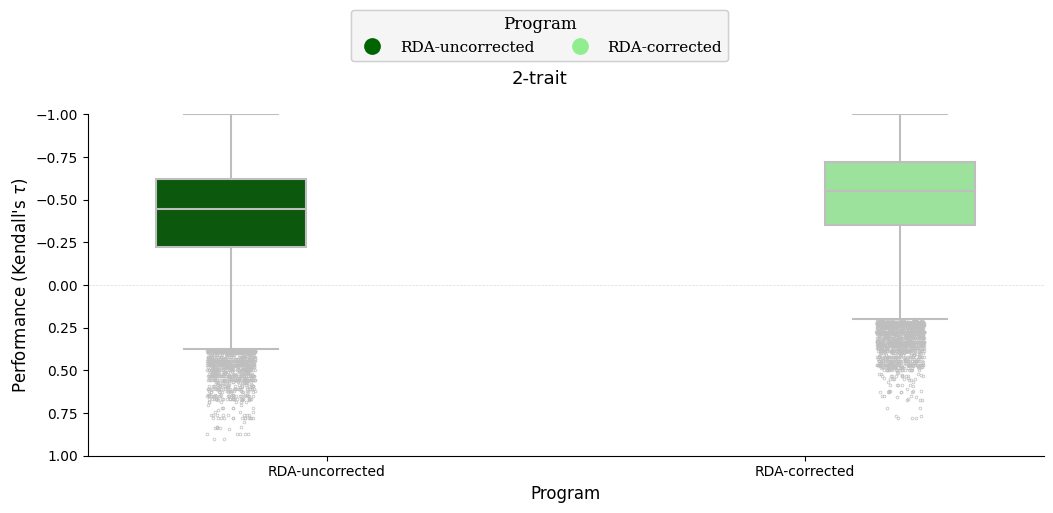

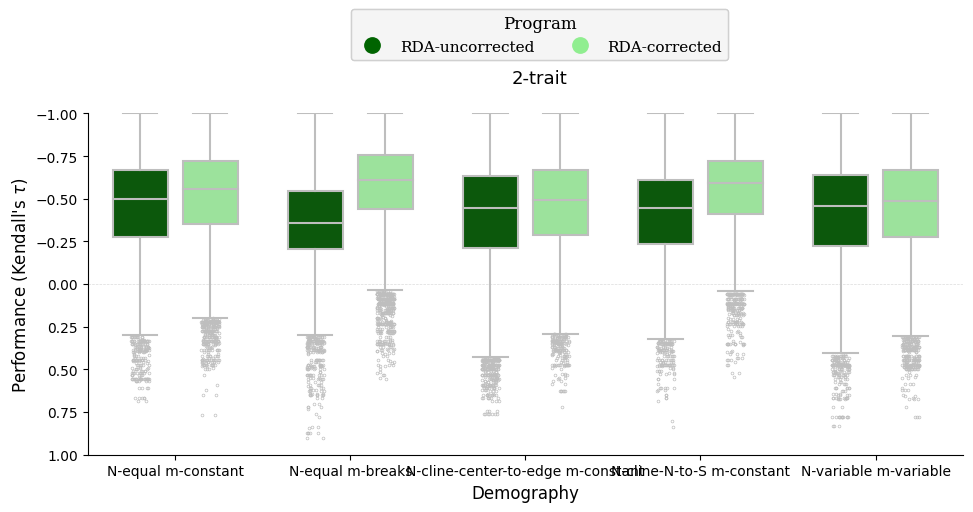

In [21]:
plot_correction_comparisons(
    validation[validation.plevel=='2-trait'],
    ntraits='2-trait',
    ignore=['noncausal_env']
)

<a id='compcomp'></a>
# complex sim scores

[top](#home)

### get scores

In [61]:
cval = pd.read_table('/home/b.lind/offsets/run_20220919_tutorial/rda/validation/tutorial_validation_scores.txt')

cval['program'] = 'rda-' + cval.structcorr
cval['marker_set'] = cval['marker_set'].str.replace('rda_outliers', 'rda outliers')

cval.head()

,seed,ind_or_pooled,ntraits,structcorr,garden,score,marker_set,program
0,tutorial,pooled,ntraits-6,nocorr,1,-0.702244,adaptive,rda-nocorr
1,tutorial,pooled,ntraits-6,nocorr,2,-0.757074,adaptive,rda-nocorr
2,tutorial,pooled,ntraits-6,nocorr,3,-0.770040,adaptive,rda-nocorr
3,tutorial,pooled,ntraits-6,nocorr,4,-0.670438,adaptive,rda-nocorr
4,tutorial,pooled,ntraits-6,nocorr,5,-0.672325,adaptive,rda-nocorr


In [62]:
cval.marker_set.value_counts()

adaptive        200
all             200
neutral         200
rda outliers    200
Name: marker_set, dtype: int64

In [63]:
cval.program.value_counts()

rda-nocorr        400
rda-structcorr    400
Name: program, dtype: int64

<a id='compmark'></a>
### compare marker sets (complex sims)

[top](#home)

x = 'program' text_x = 0.43


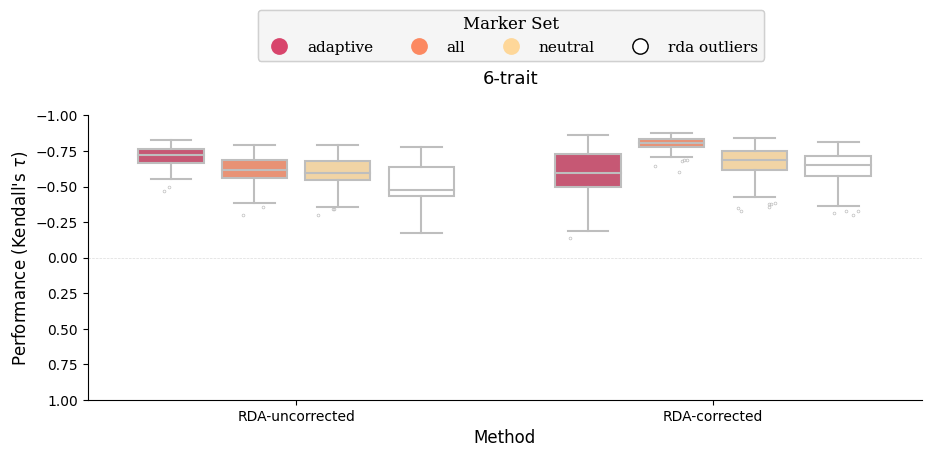

In [68]:
plot_marker_comparisons(
    data=cval,
    ntraits='6-trait',
    ignore=['noncausal_env', 'landscape', 'glevel', 'pleio', 'slevel', 'popsize', 'migration', 'noncausal_env',
           'demography']
)

<a id='compstruct'></a>
### compare structure-corrected vs uncorrected  (complex sims)

[top](#home)

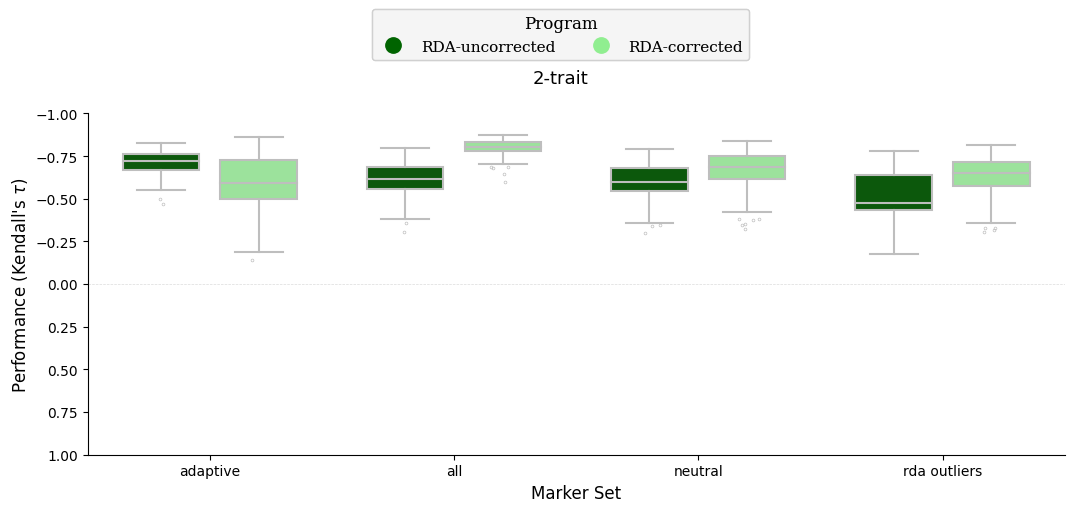

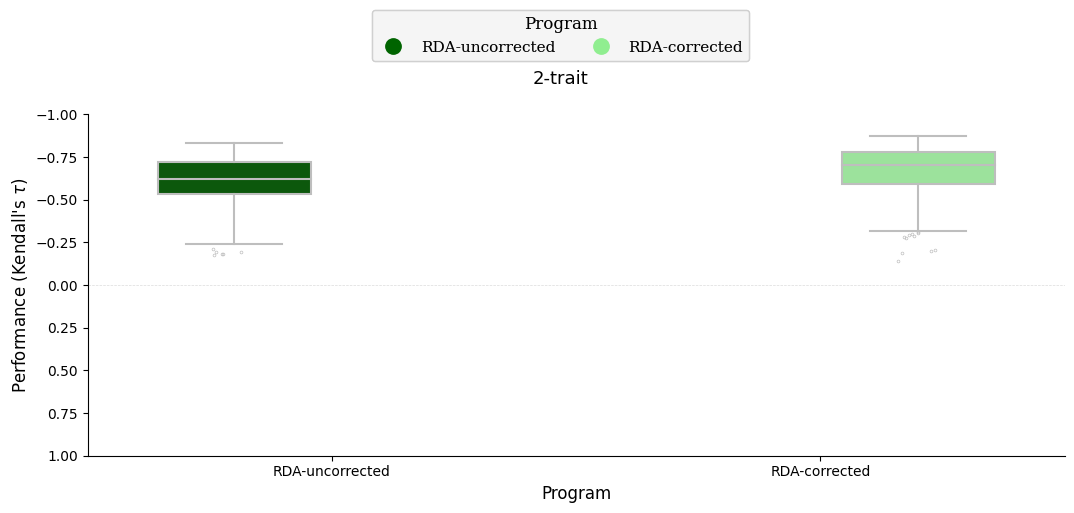

In [26]:
plot_correction_comparisons(
    data=cval,
    ignore=['noncausal_env', 'landscape', 'glevel', 'pleio', 'slevel', 'popsize', 'migration', 'noncausal_env',
           'demography']
)

In [27]:
formatclock(dt.now() - t0)

'0-00:02:05'